In [60]:
import matplotlib.pyplot as plt
import numpy as np

# read ../04_output/runner_matrix__2024_04_30_22_22_00__keep_length__default__history.npy
path = '../04_output/runner_matrix__2024_04_30_22_32_44__length_average__weather__history.npy'

title = 'variable: ' + path.split('__')[2] +'; mode: '+ path.split('__')[3]

npy = np.load(path, allow_pickle=True)
print(title)

variable: length_average; mode: weather


In [61]:
# read npz['runner_matrix']
npy.item().keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

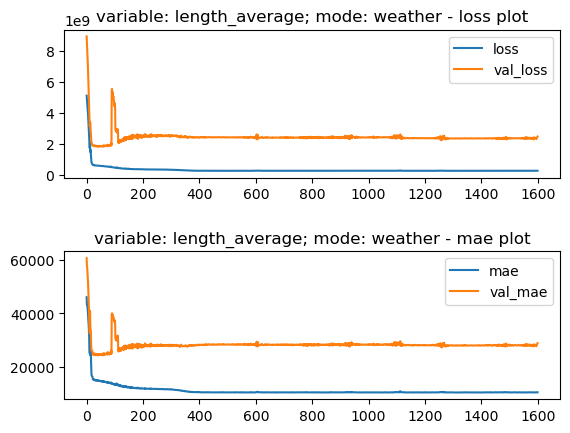

In [62]:
# for name in ['loss', 'val_loss']:
#     plt.plot(npy.item()[name], label=name)
# plt.legend()

# for name in ['mae', 'val_mae']:
#     plt.plot(npy.item()[name], label=name)
# plt.legend()
# plot loss and mae together in 2 subplots

fig, axs = plt.subplots(2)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

for name in ['loss', 'val_loss']:
    axs[0].plot(npy.item()[name], label=name)
axs[0].legend()
axs[0].set_title(title + ' - loss plot')

for name in ['mae', 'val_mae']:
    axs[1].plot(npy.item()[name], label=name)
axs[1].legend()
axs[1].set_title(title + ' - mae plot')

plt.show()


In [43]:
# geoviz
import numpy as np
# runner_matrix__2024_04_30_22_30_33__length_average__default__y.npy
# runner_matrix__2024_04_30_22_30_33__length_average__default__output.npy
path_output = '../04_output/runner_matrix__2024_04_30_22_30_33__length_average__default__output.npy'
path_y = '../04_output/runner_matrix__2024_04_30_22_30_33__length_average__default__y.npy'
npy_output = np.load(path_output, allow_pickle=True)
npy_y = np.load(path_y, allow_pickle=True)


 38%|███▊      | 20/52 [00:06<00:09,  3.33it/s]/var/folders/4_/6v8kr_vd5fq5m6wfd4sgqwmw0000gn/T/ipykernel_54719/443616781.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
100%|██████████| 52/52 [00:15<00:00,  3.29it/s]


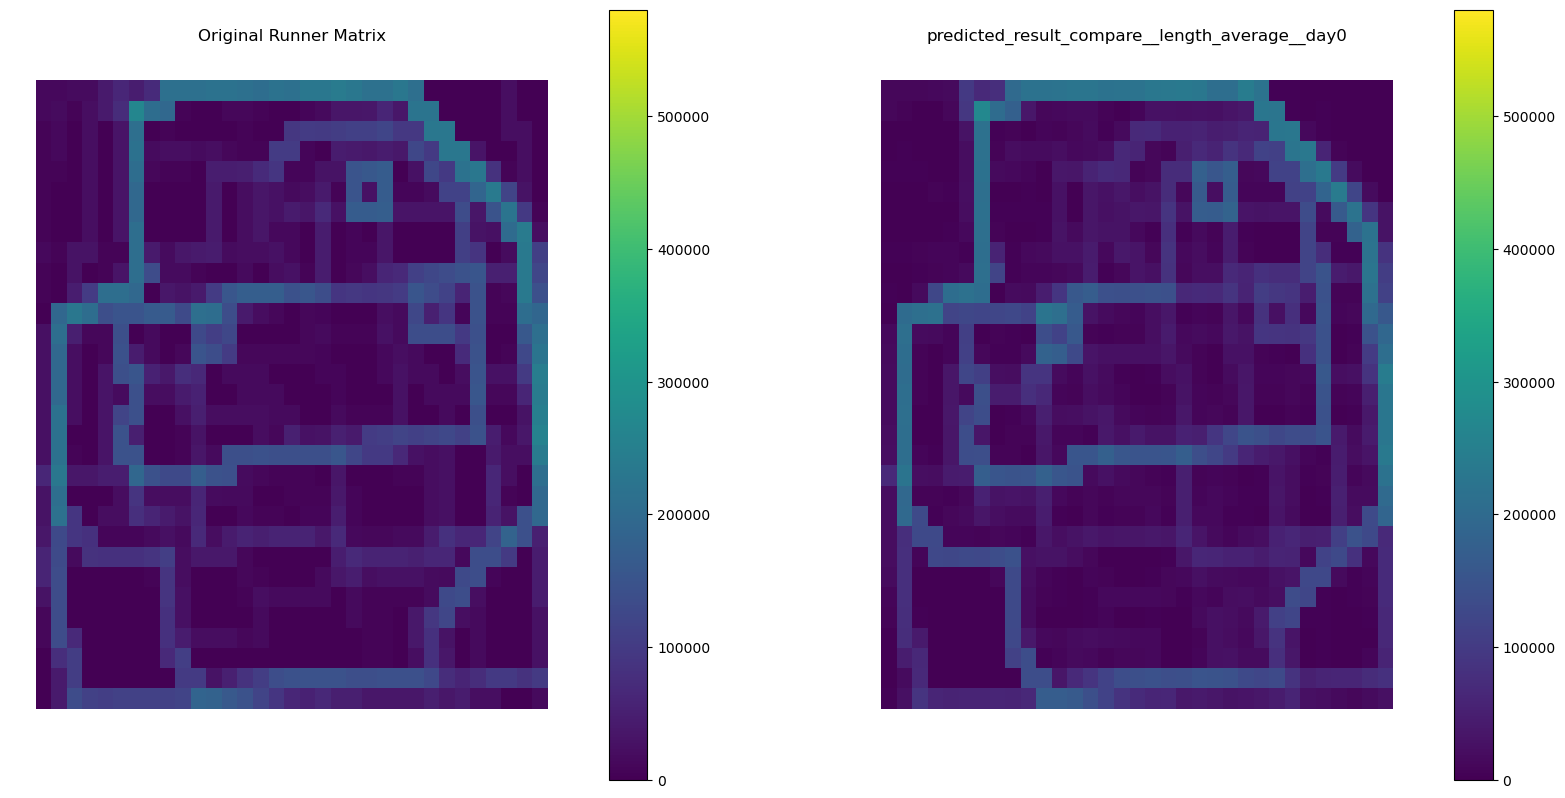

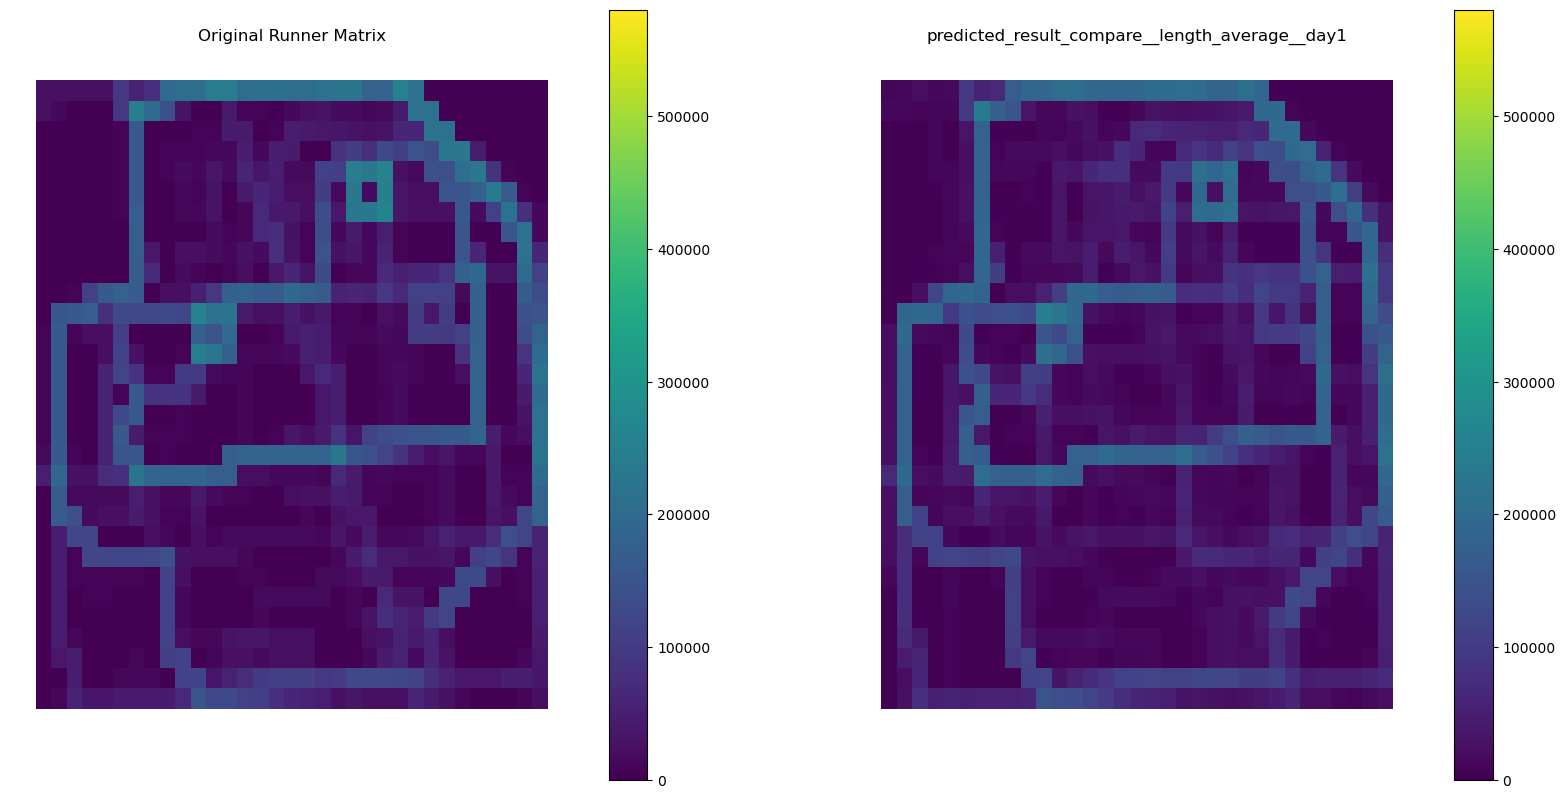

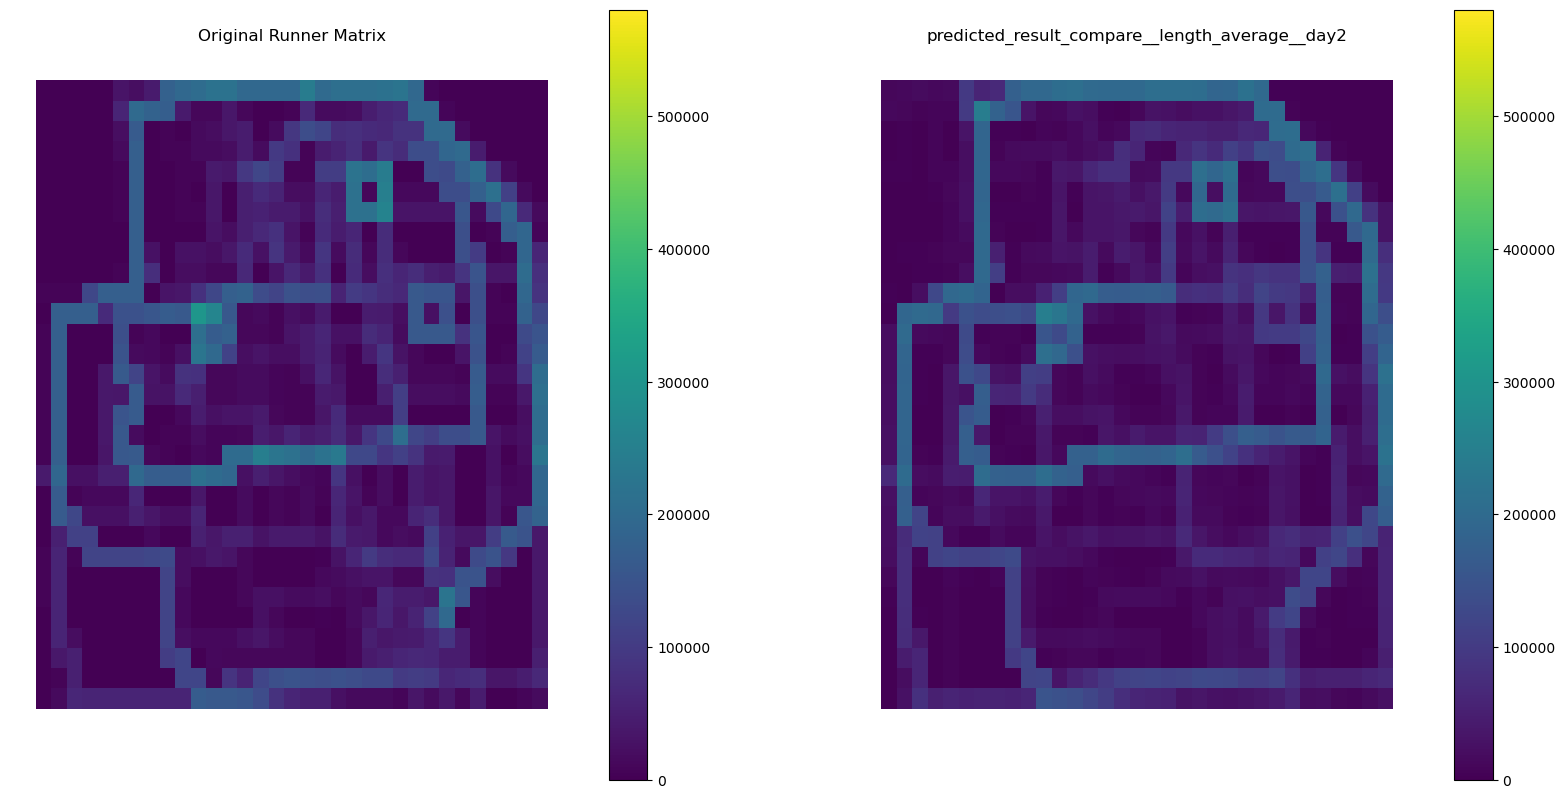

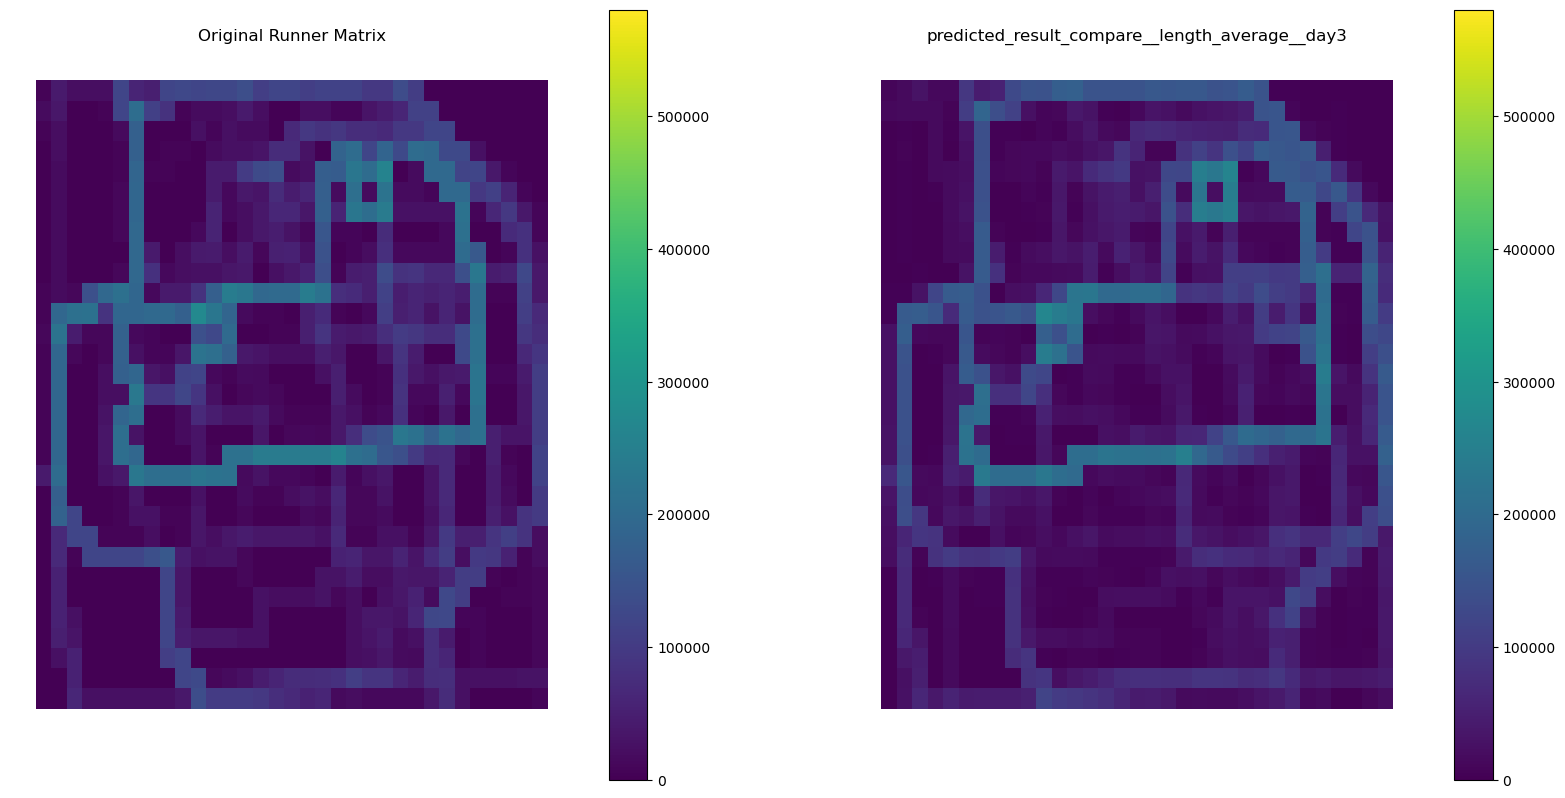

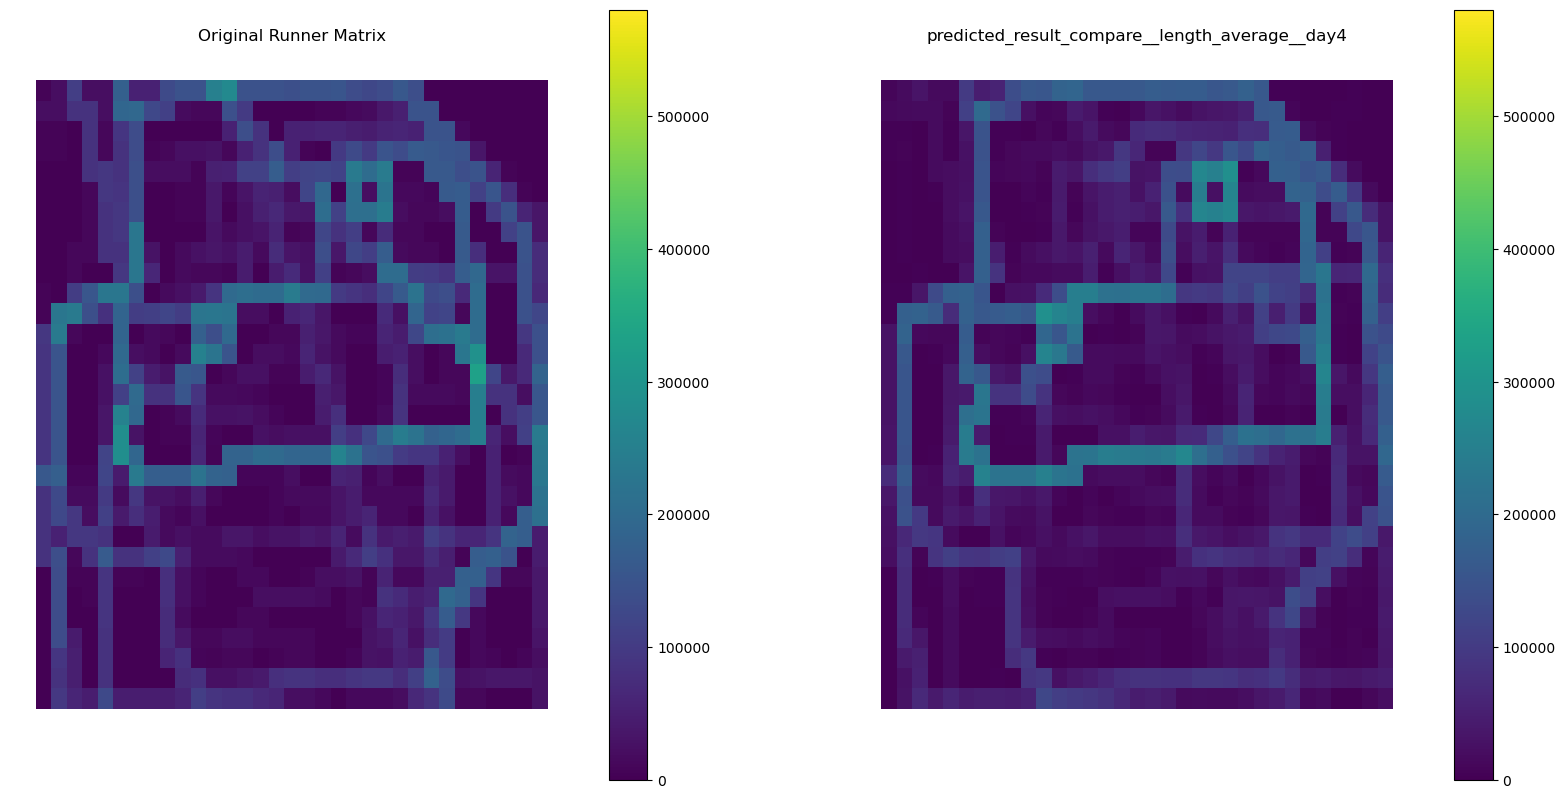

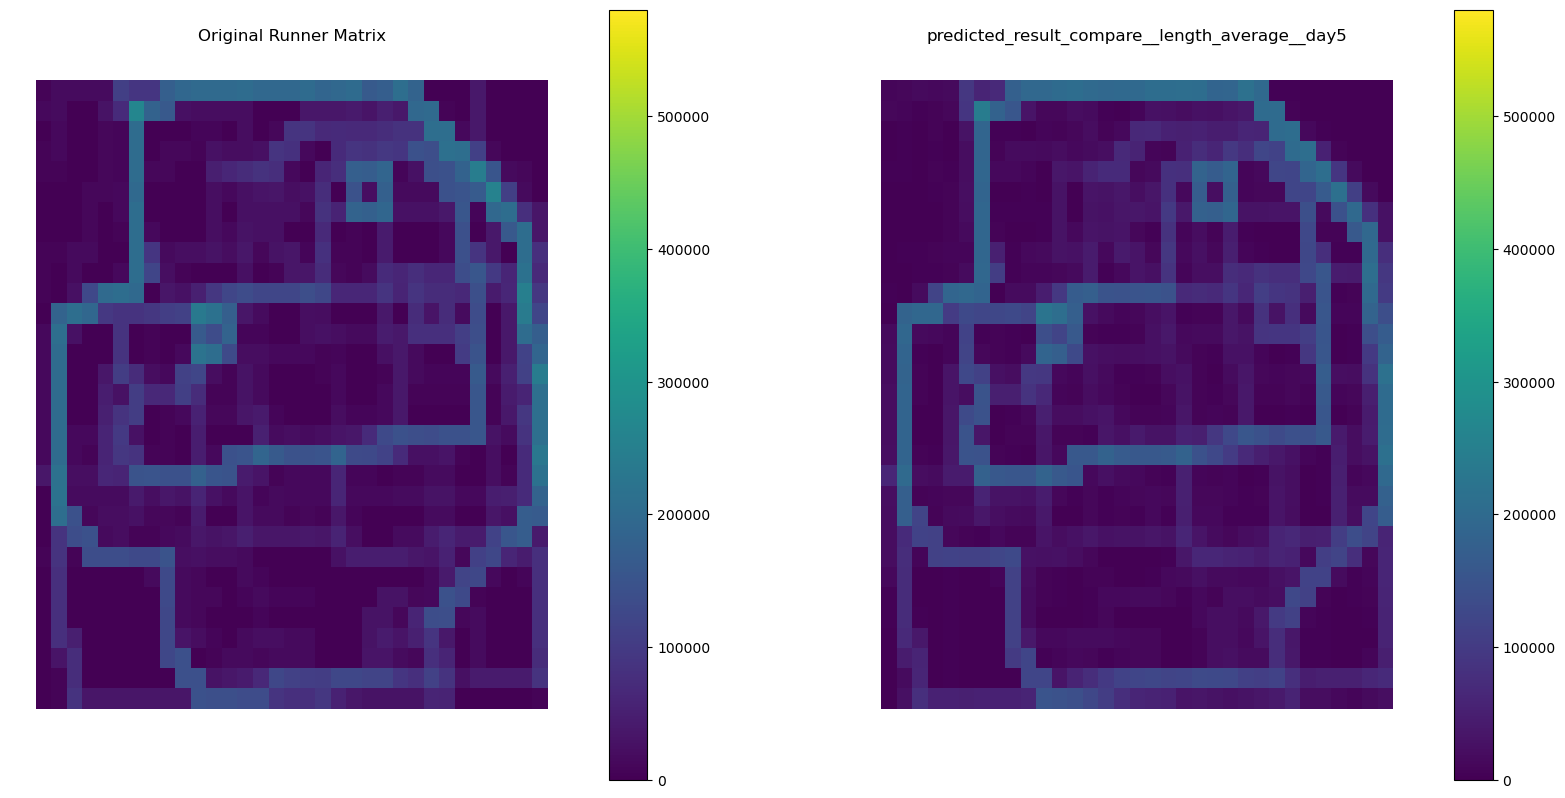

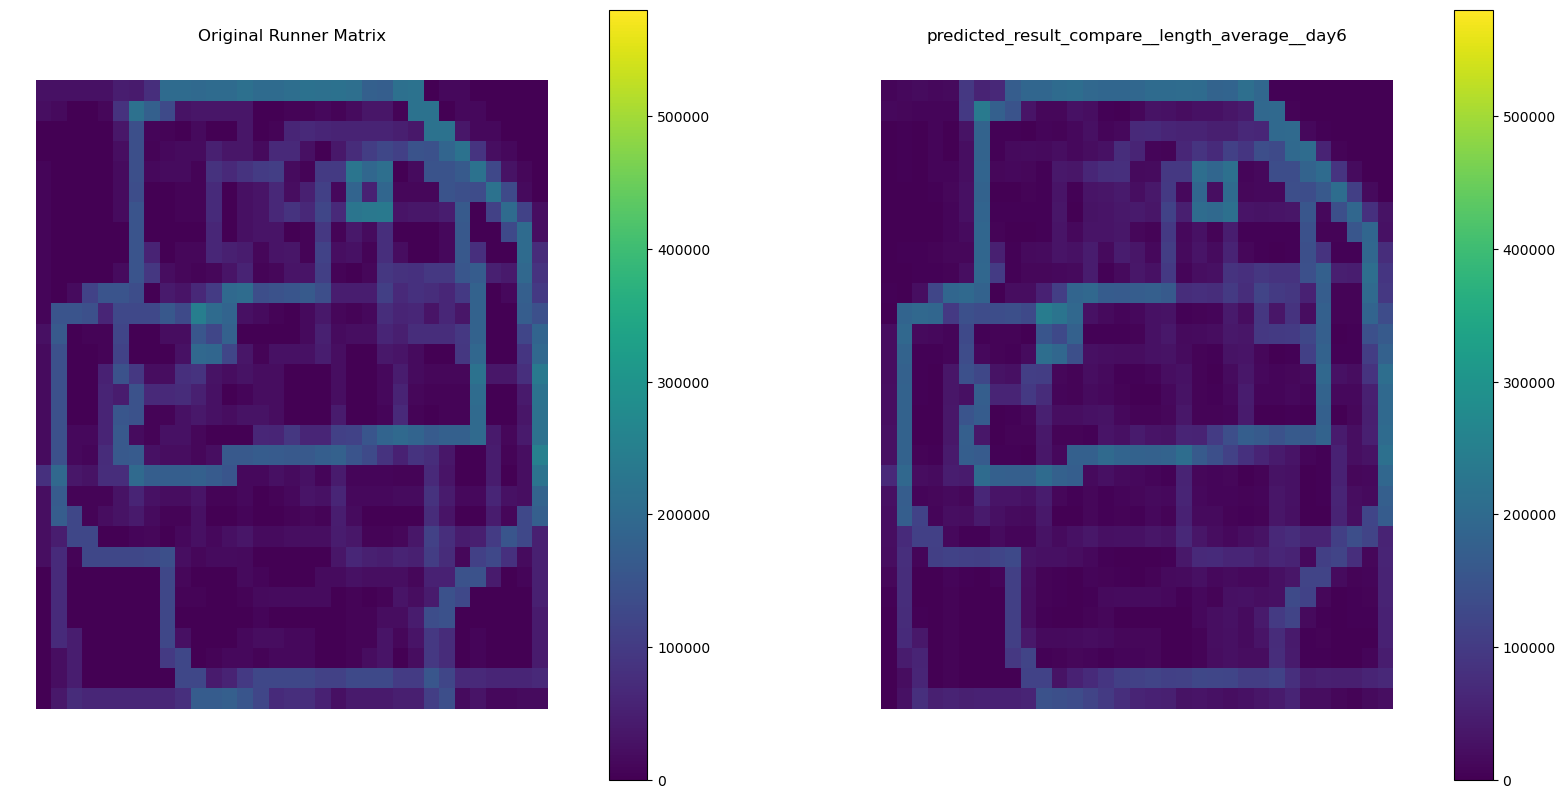

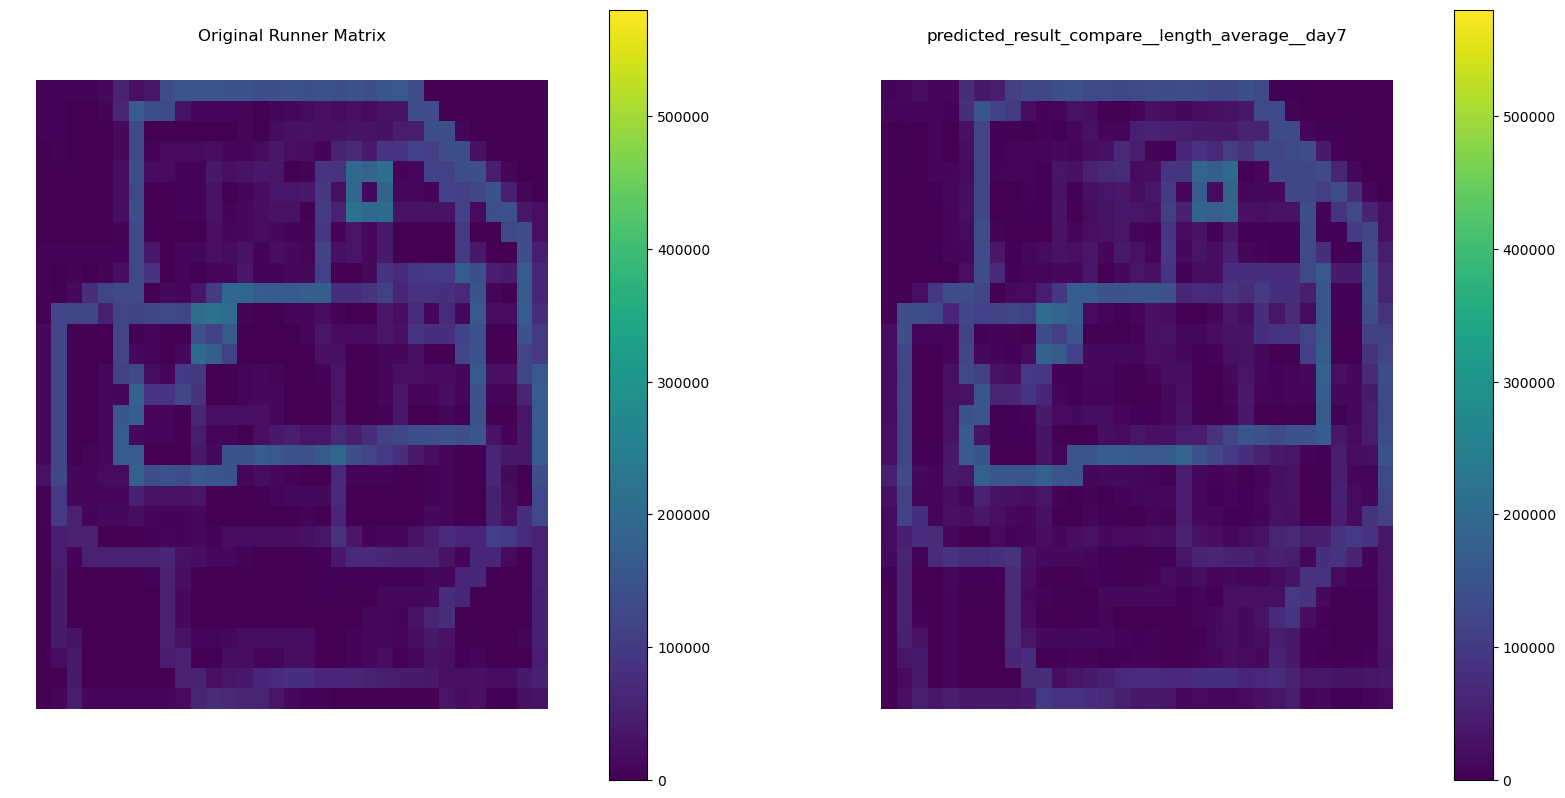

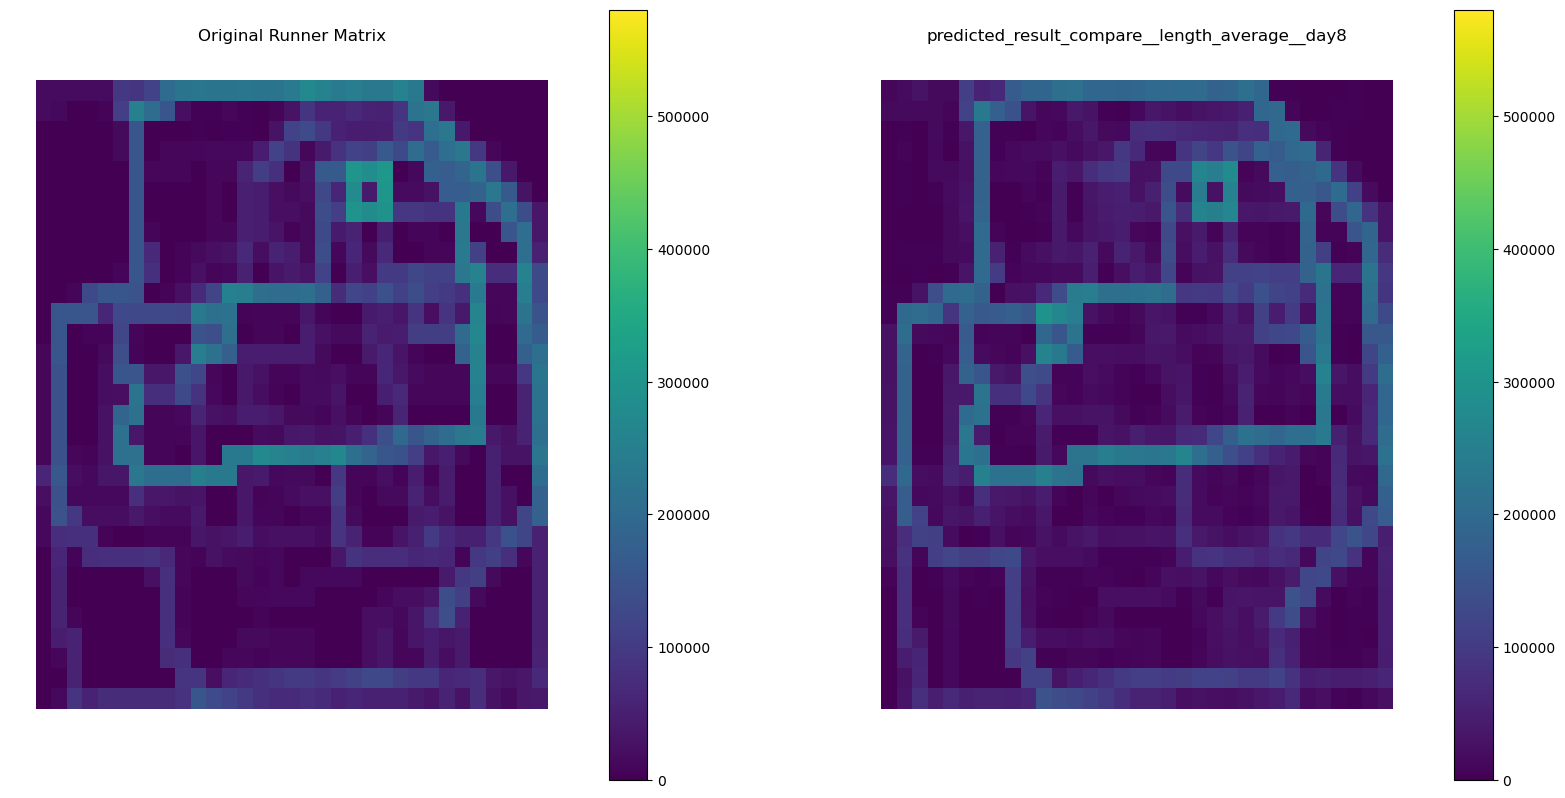

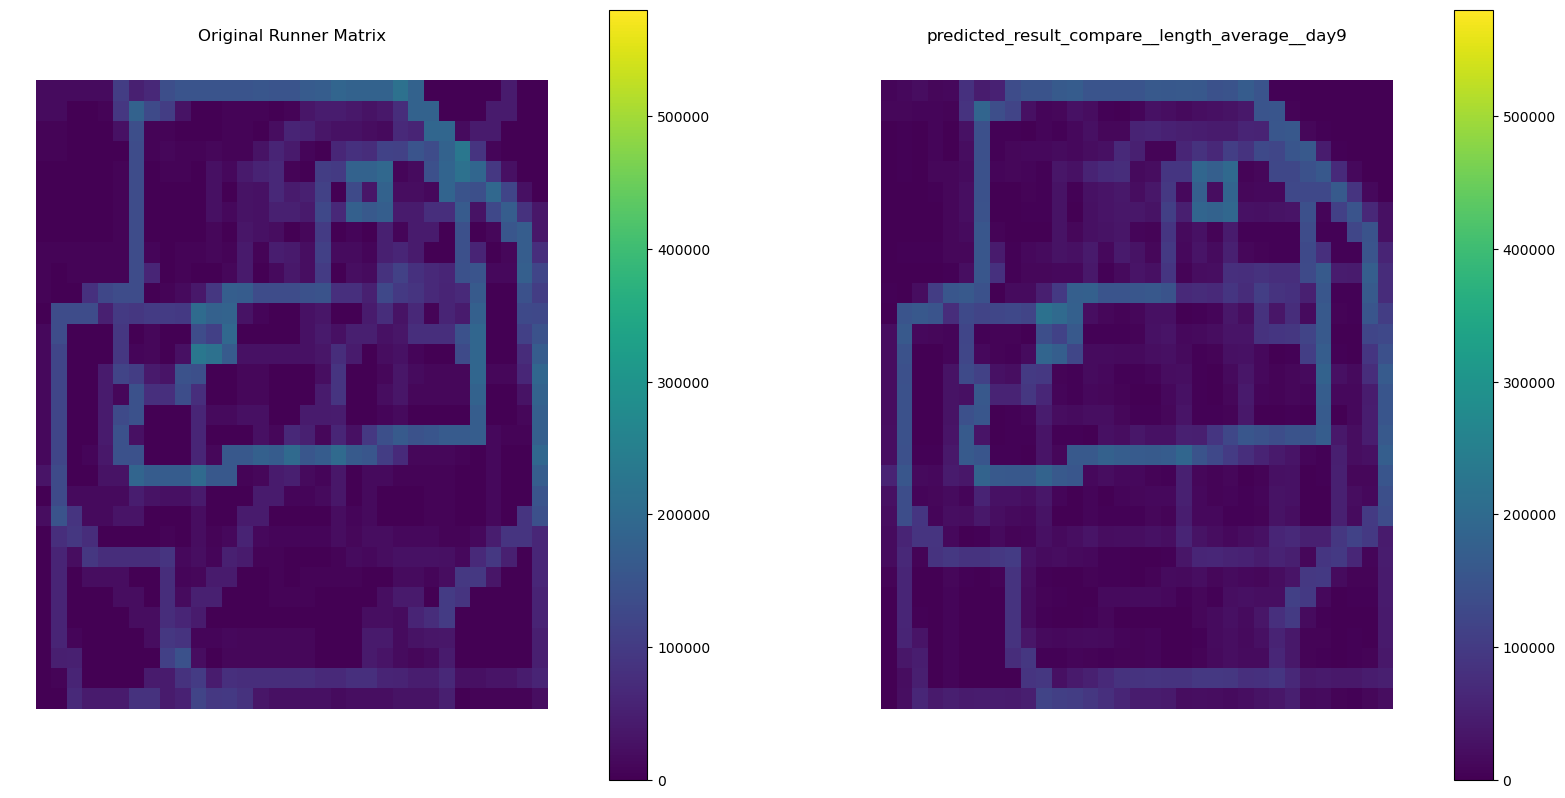

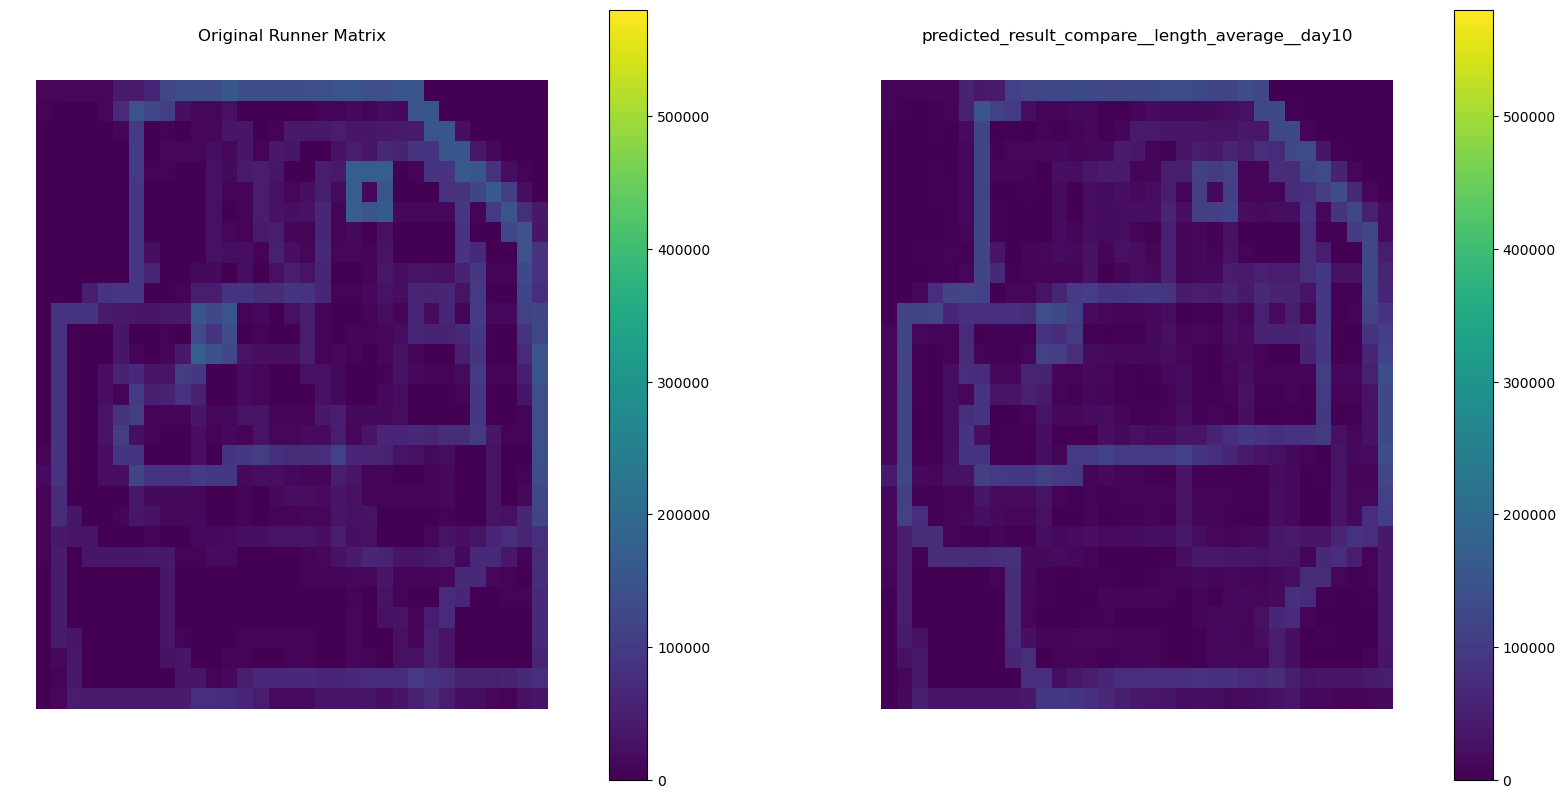

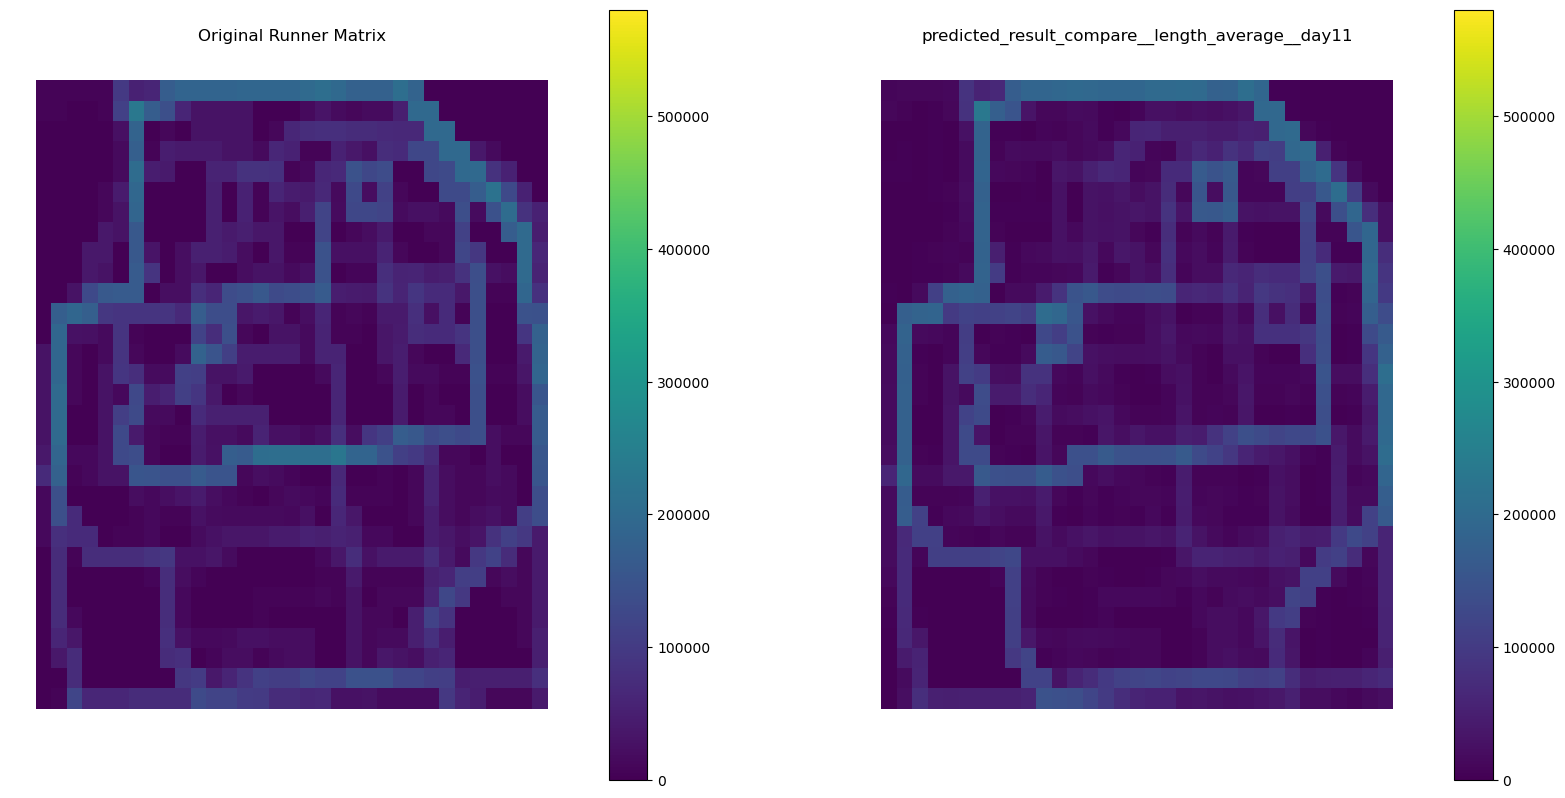

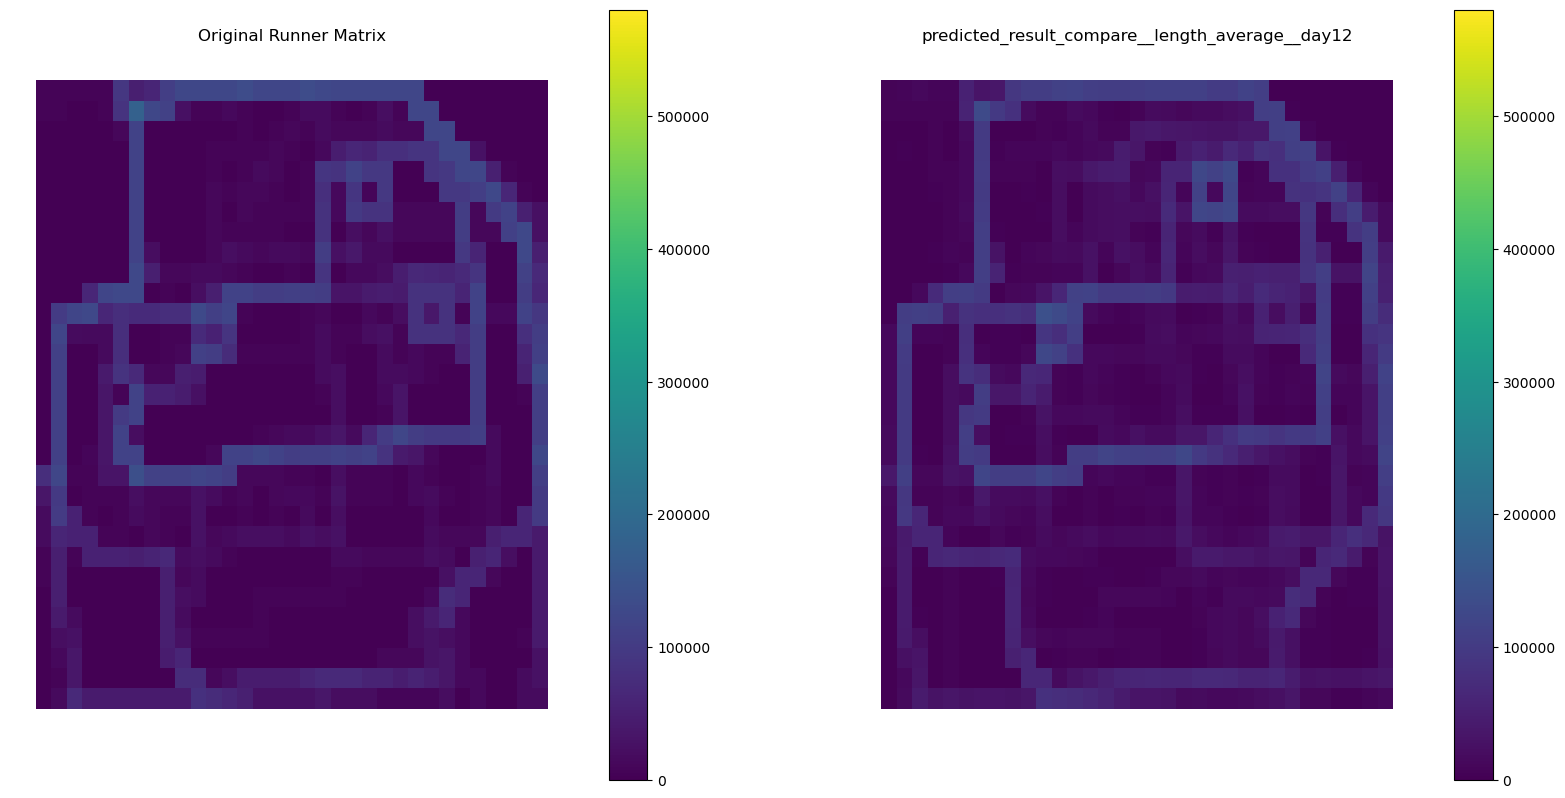

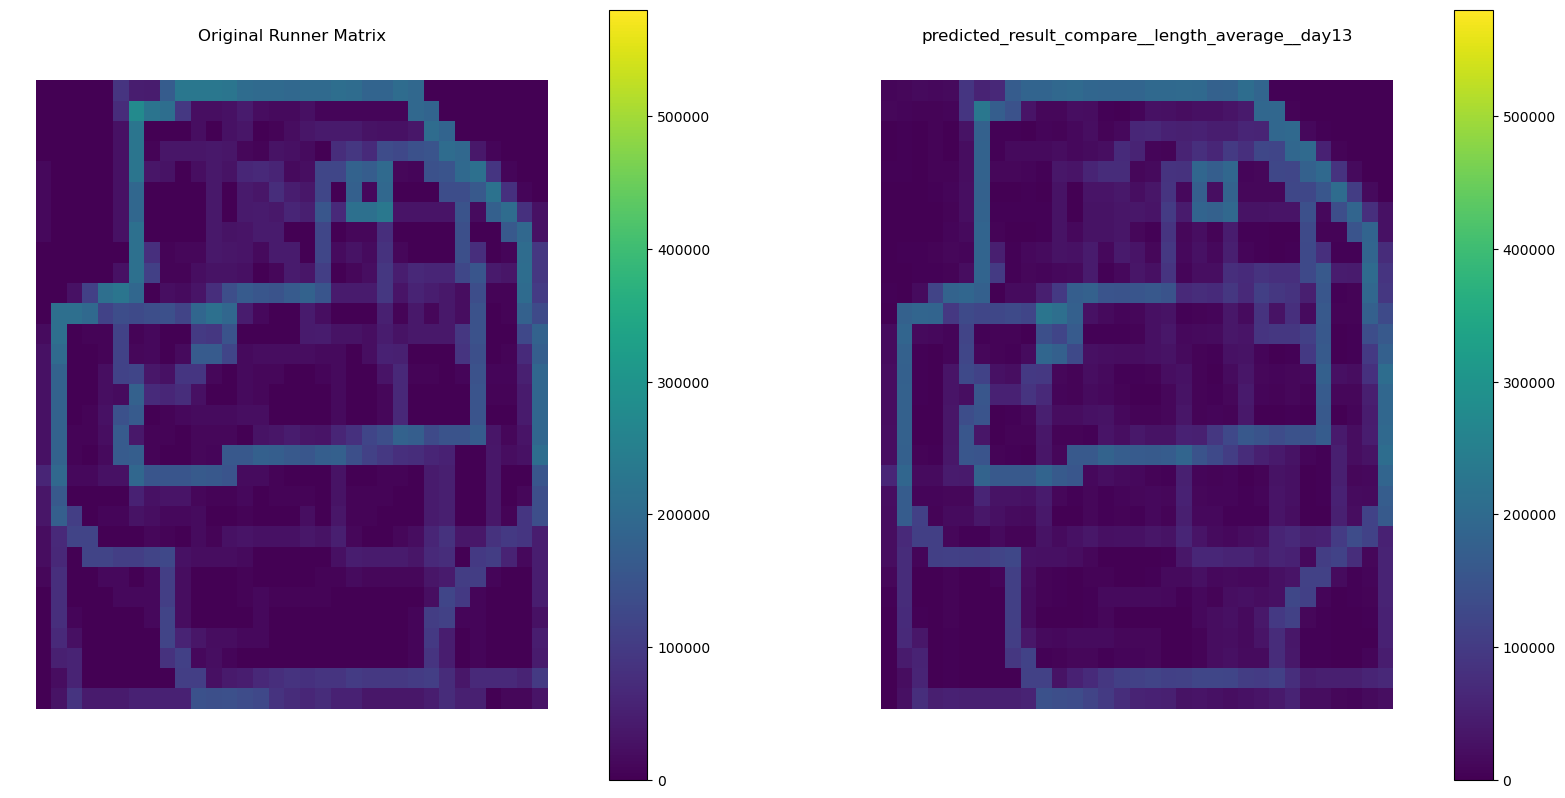

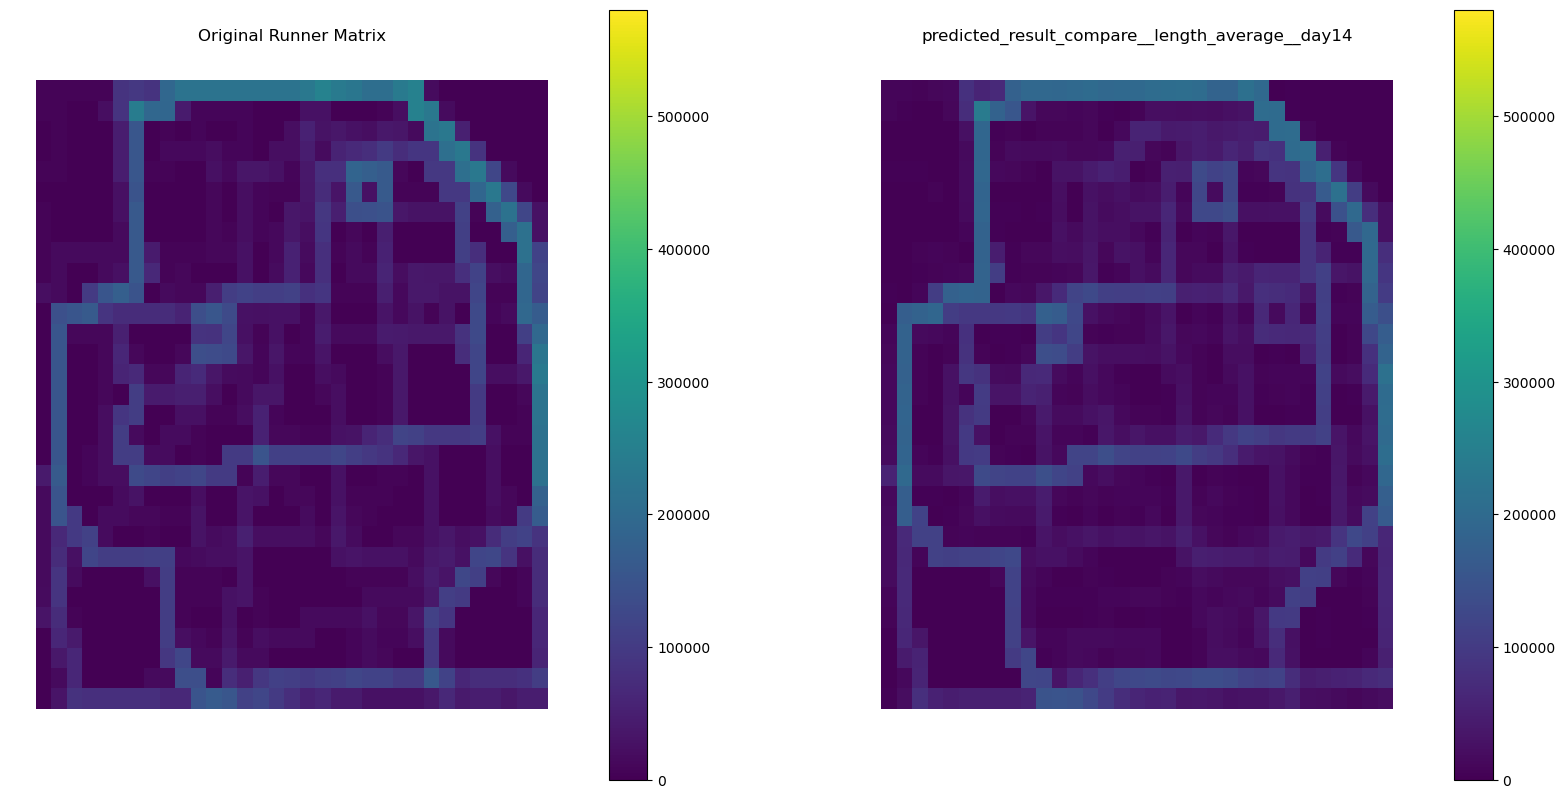

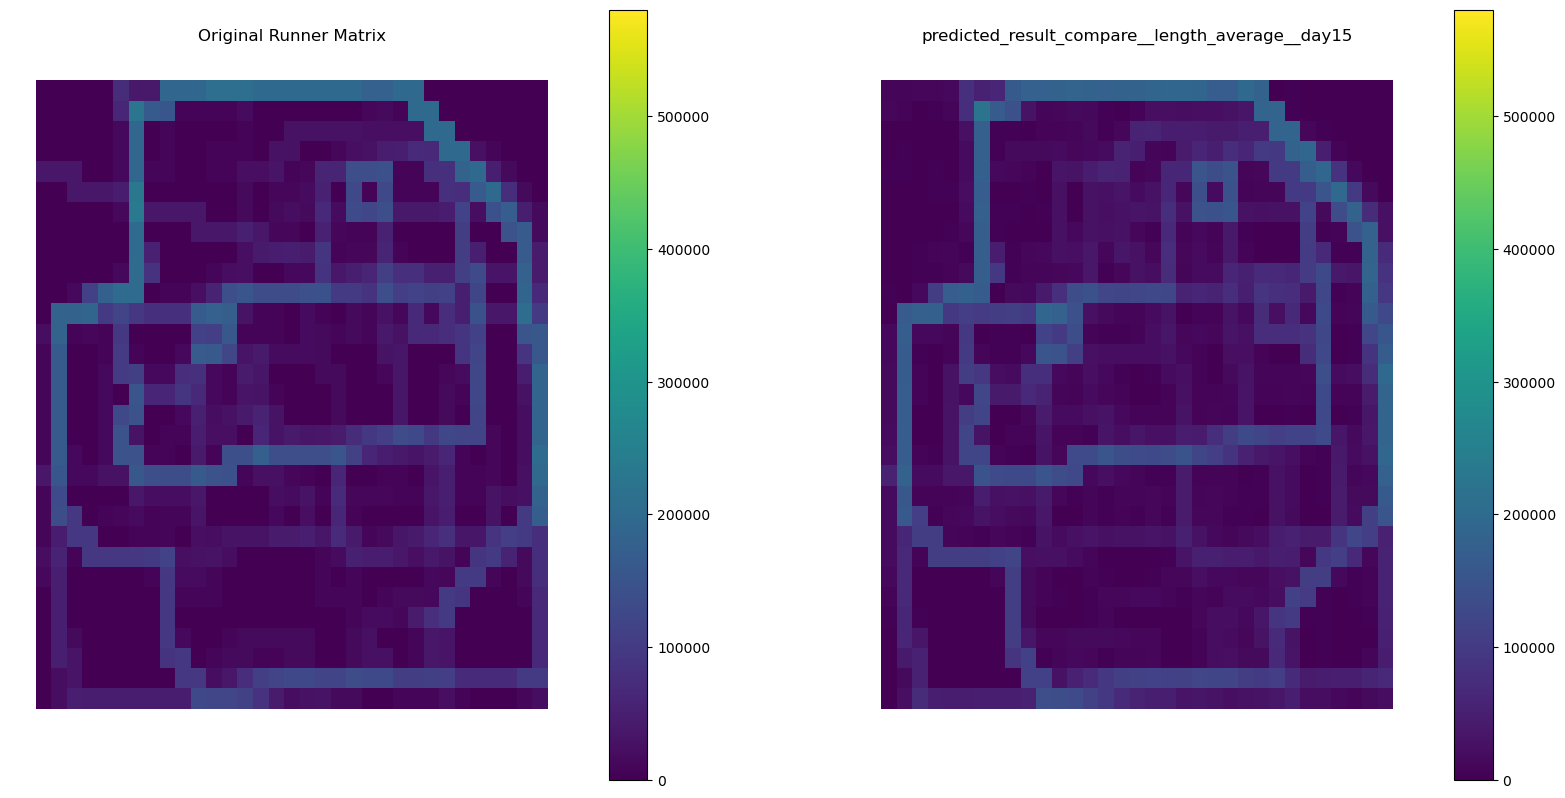

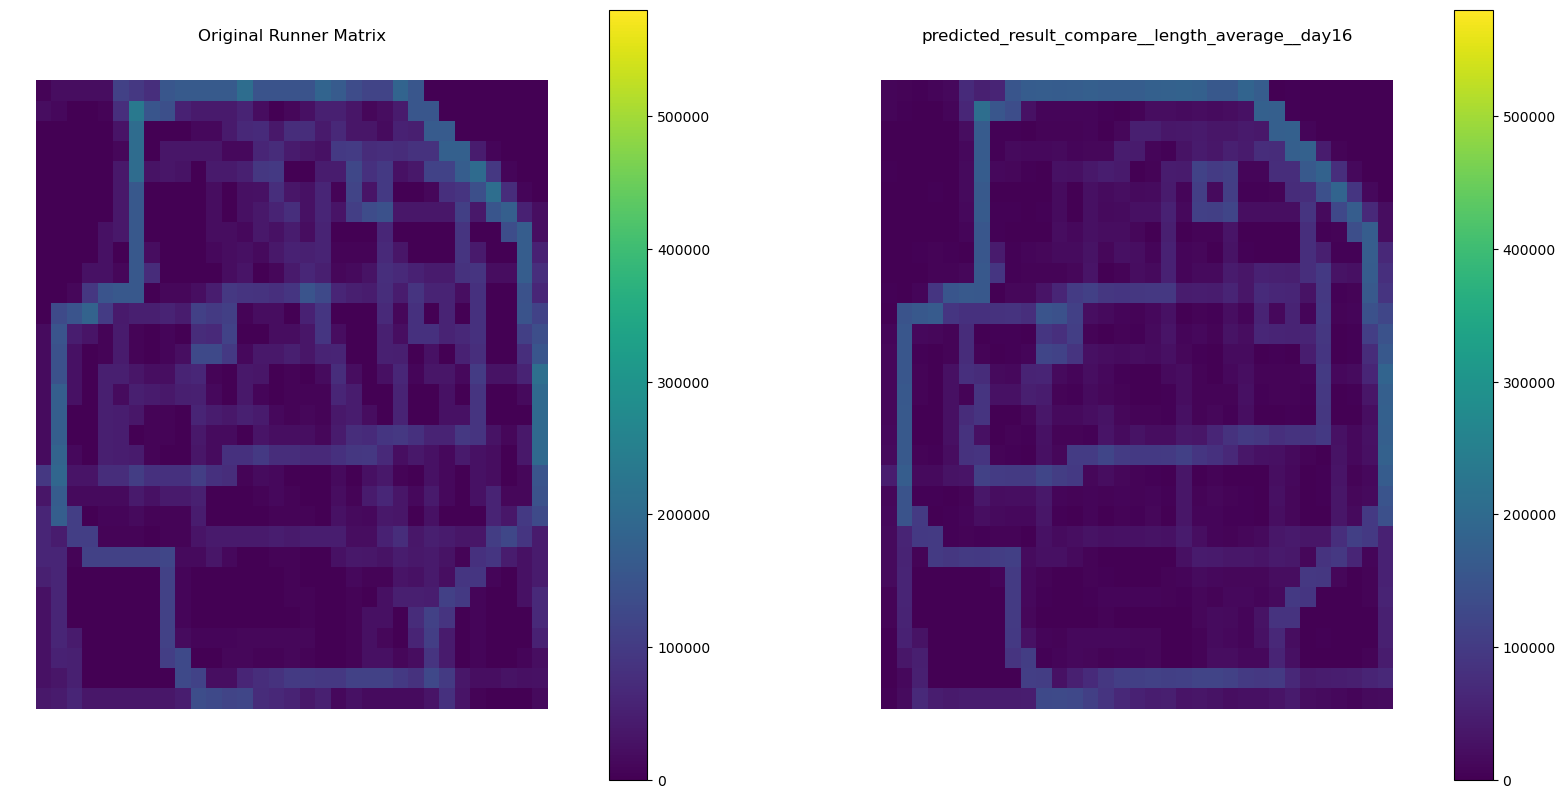

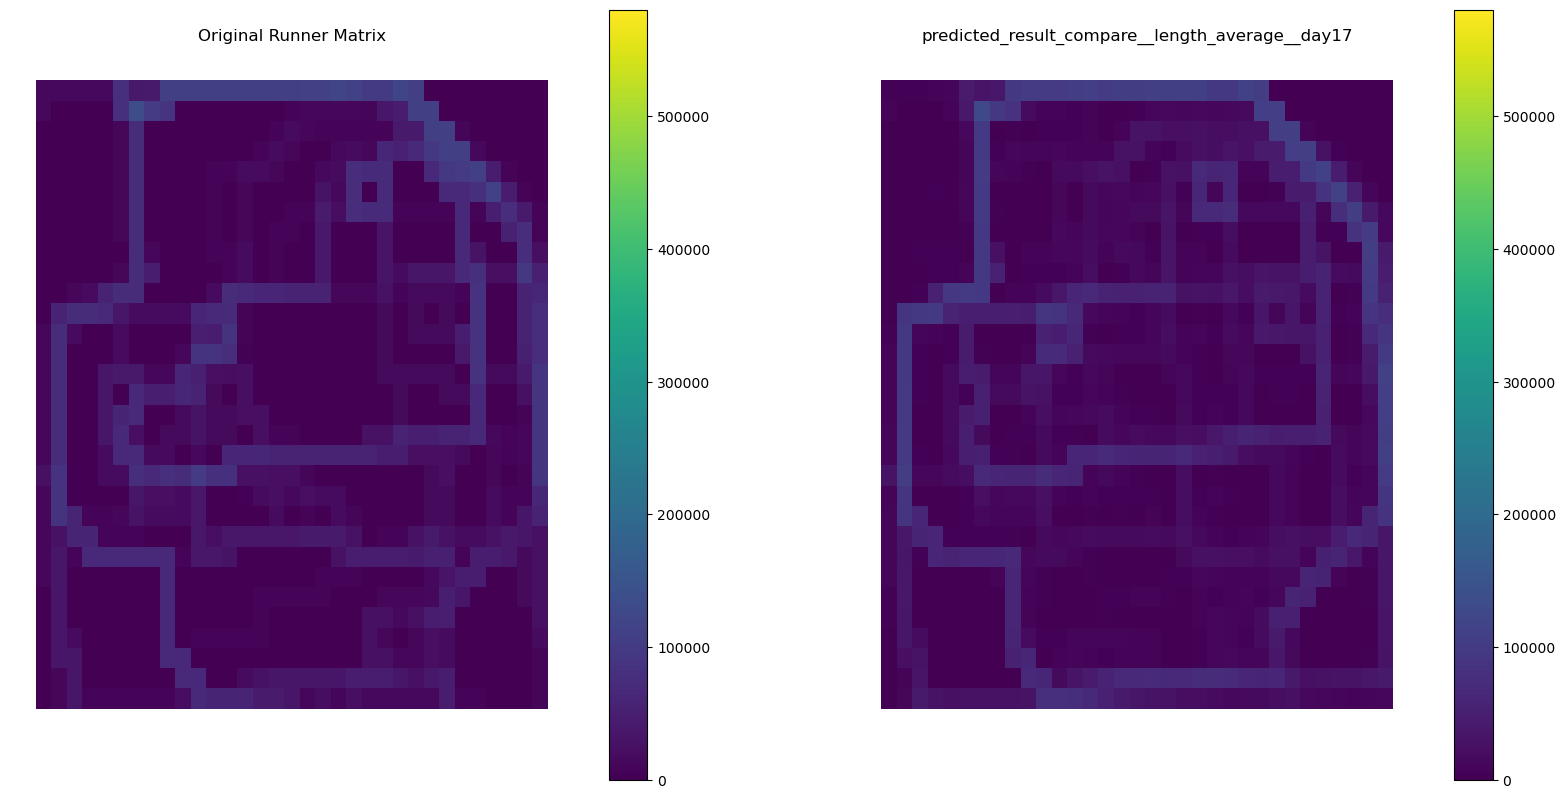

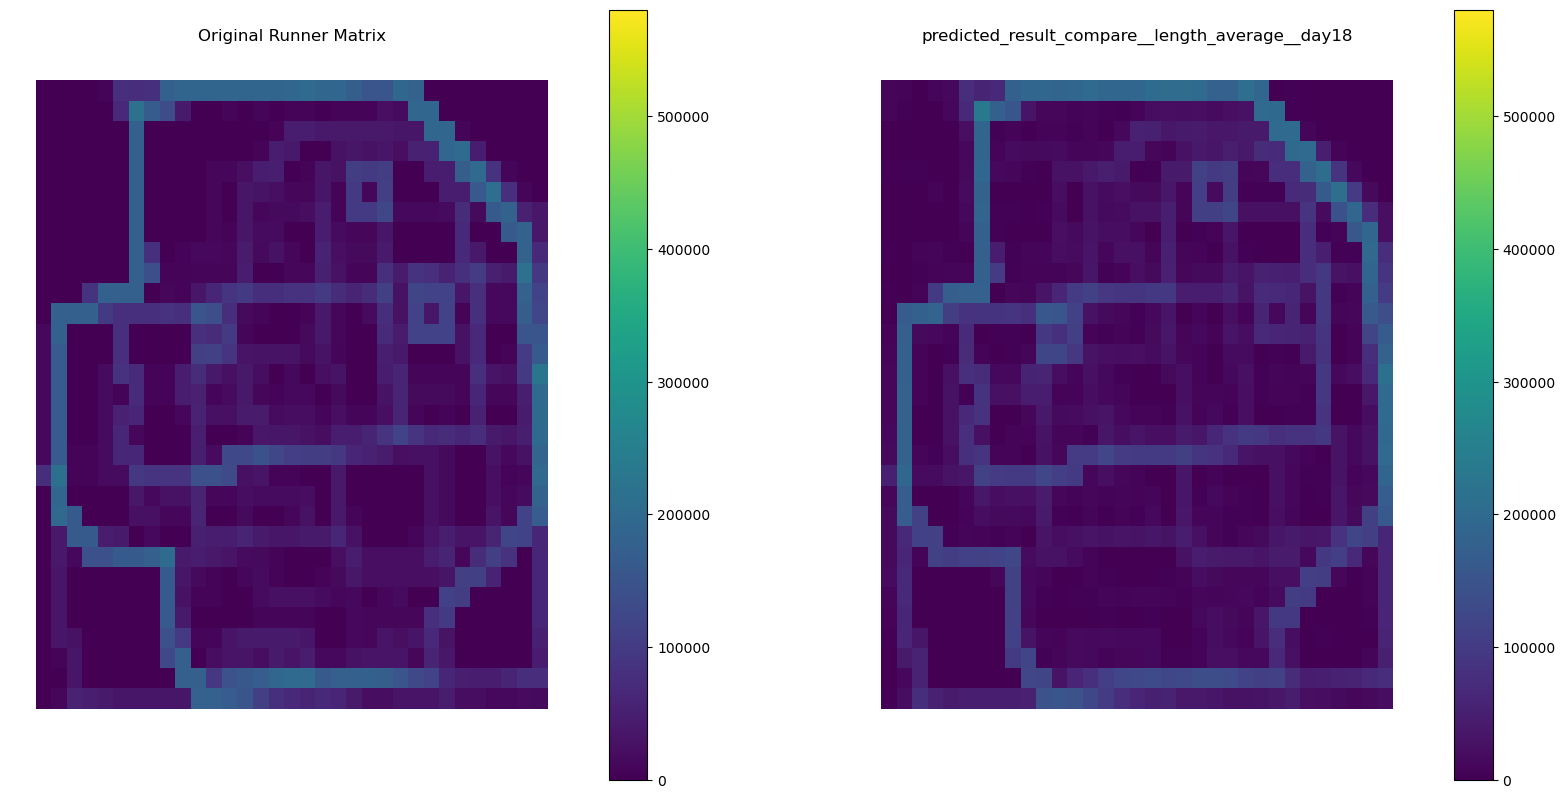

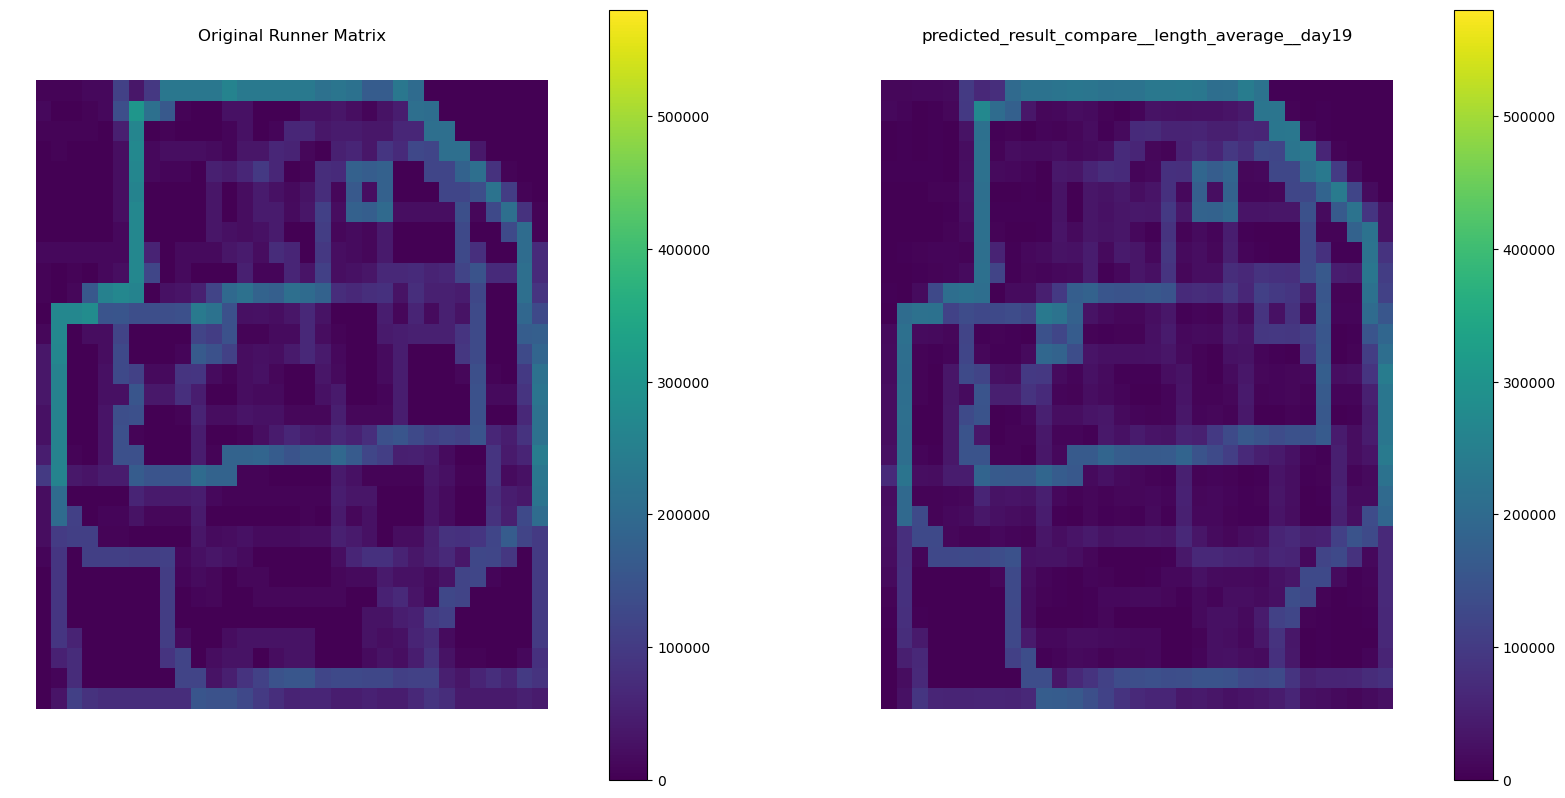

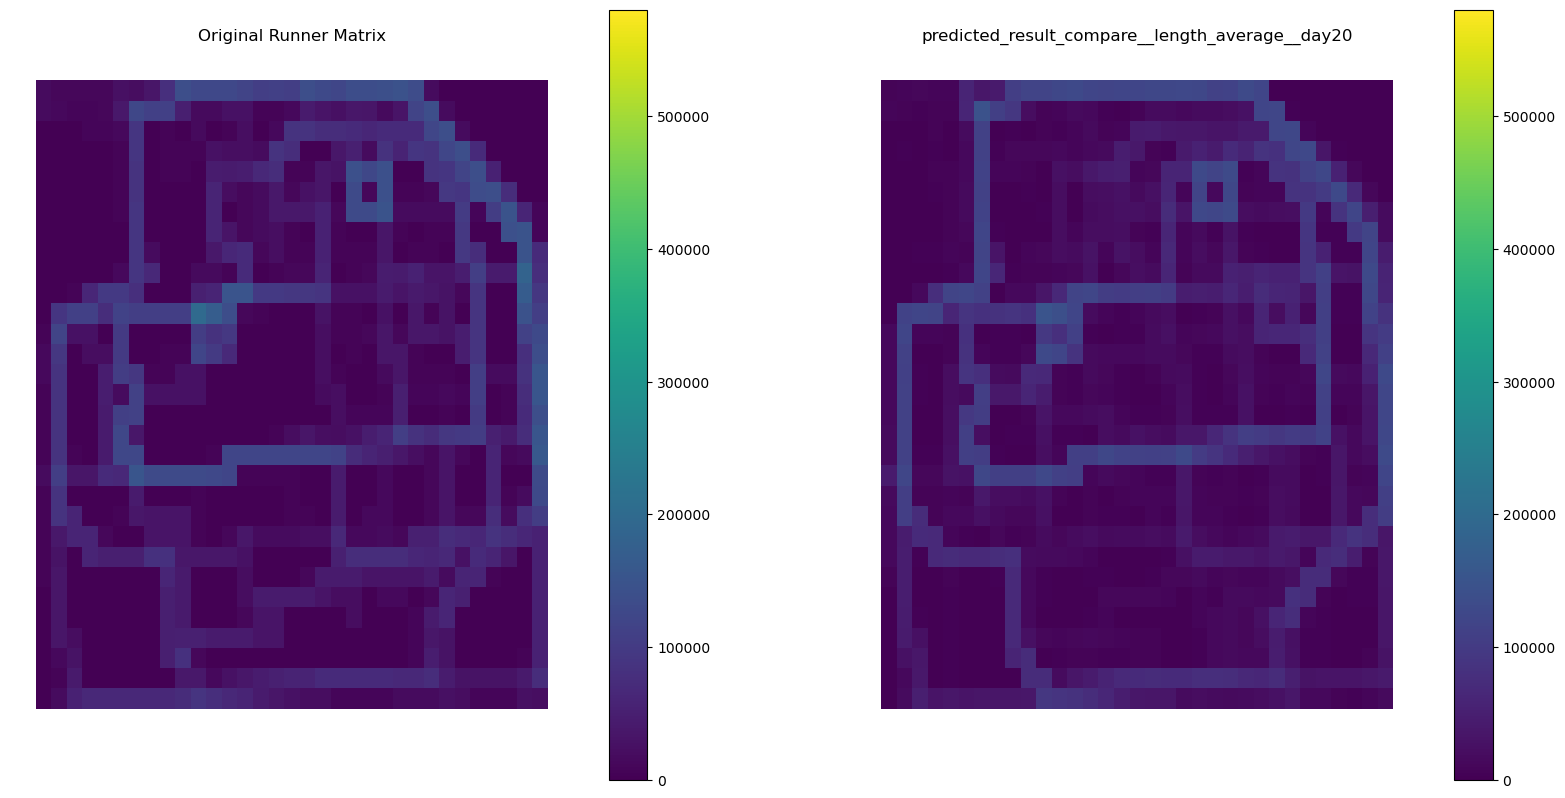

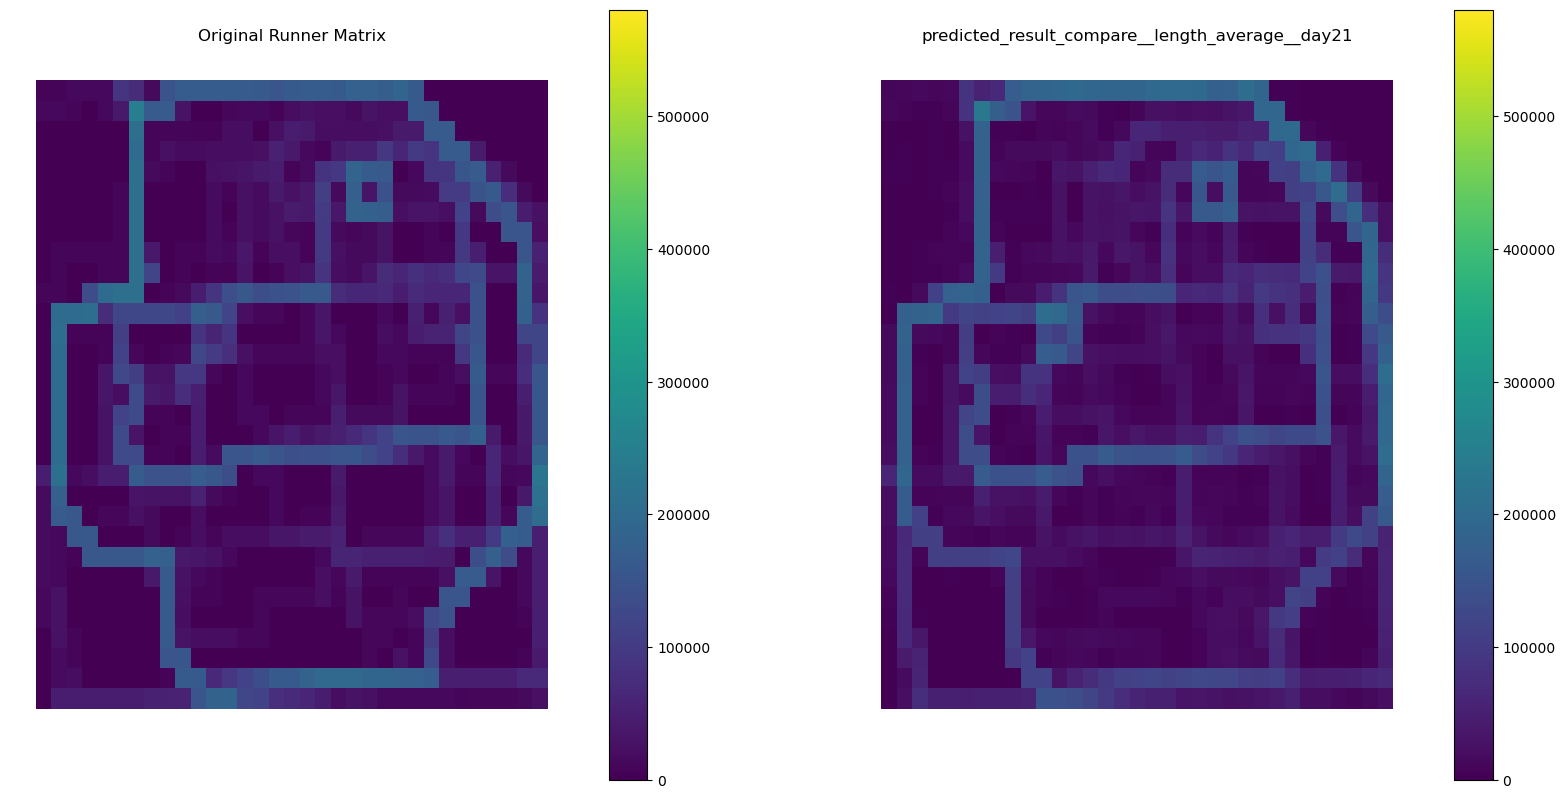

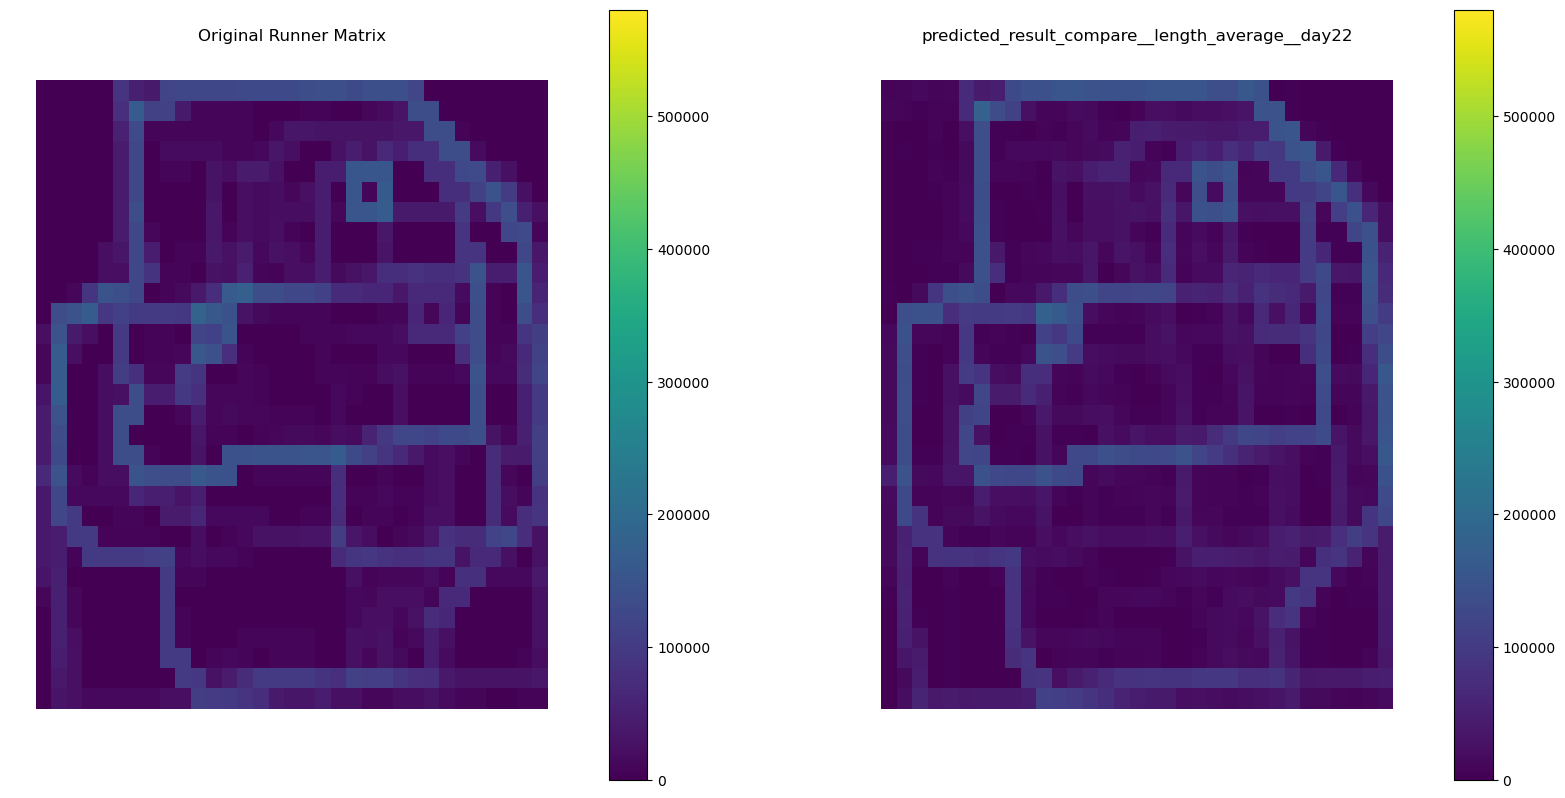

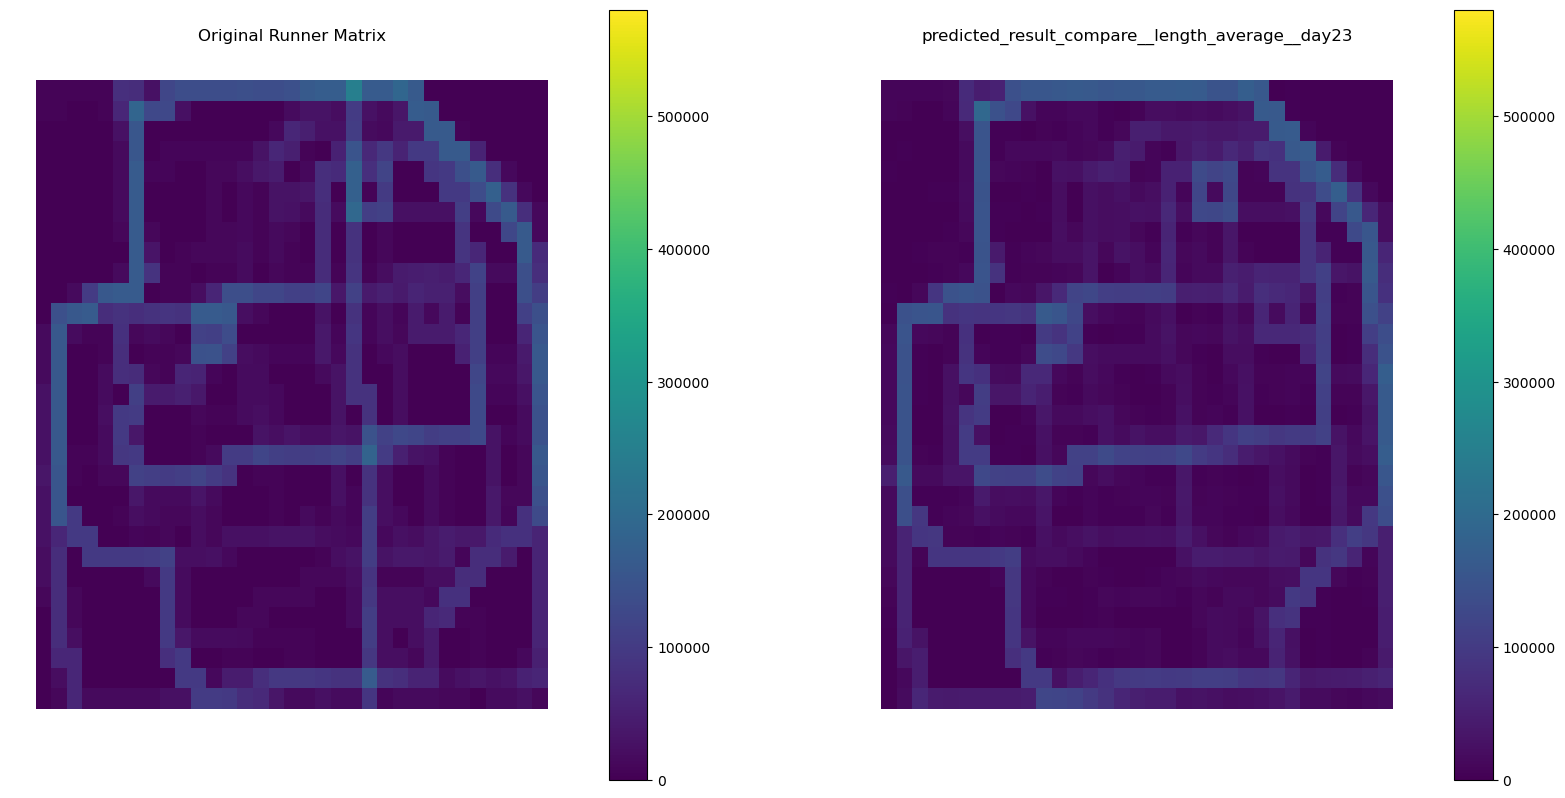

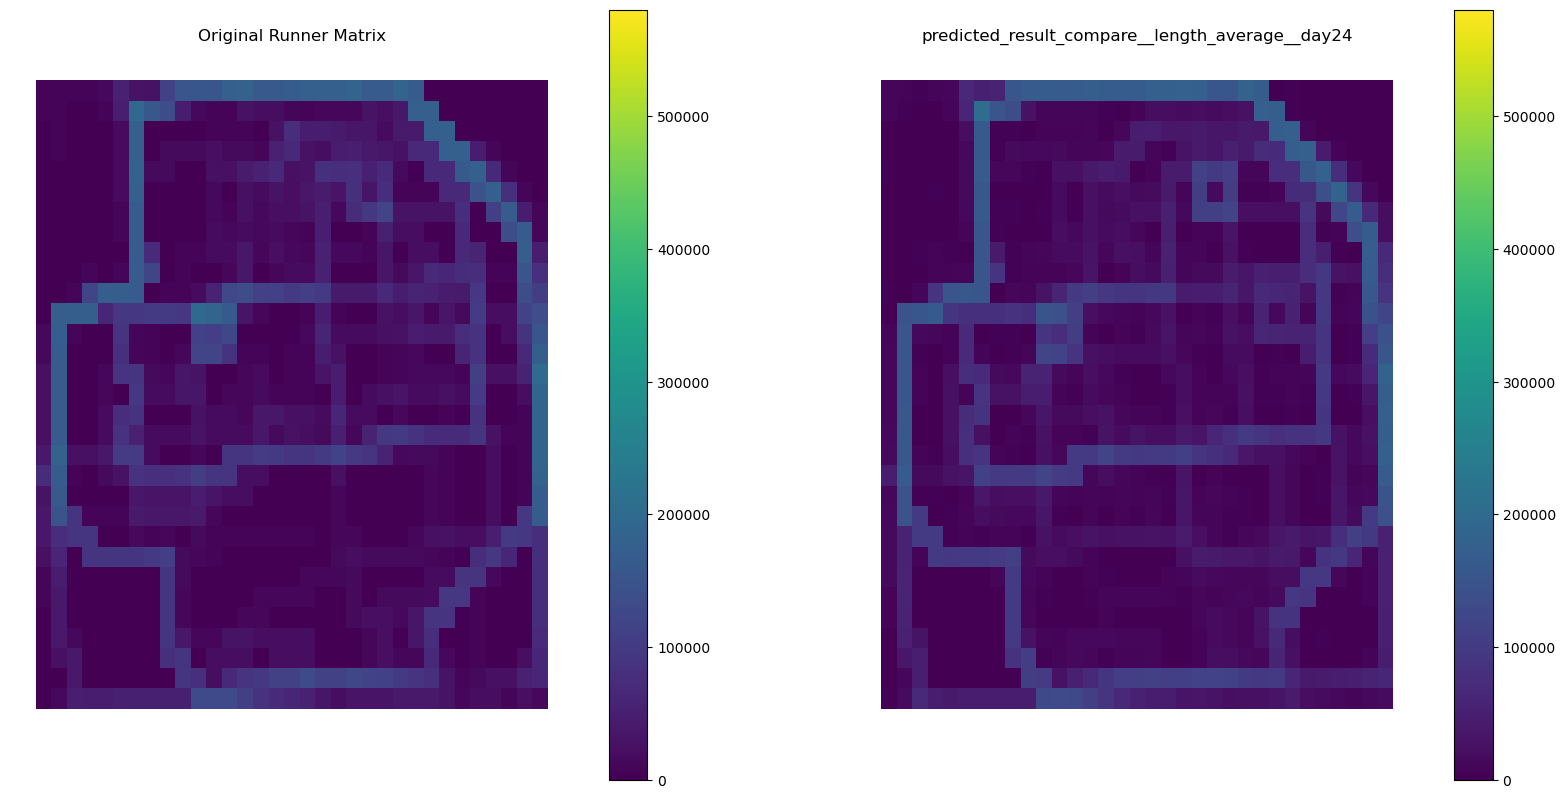

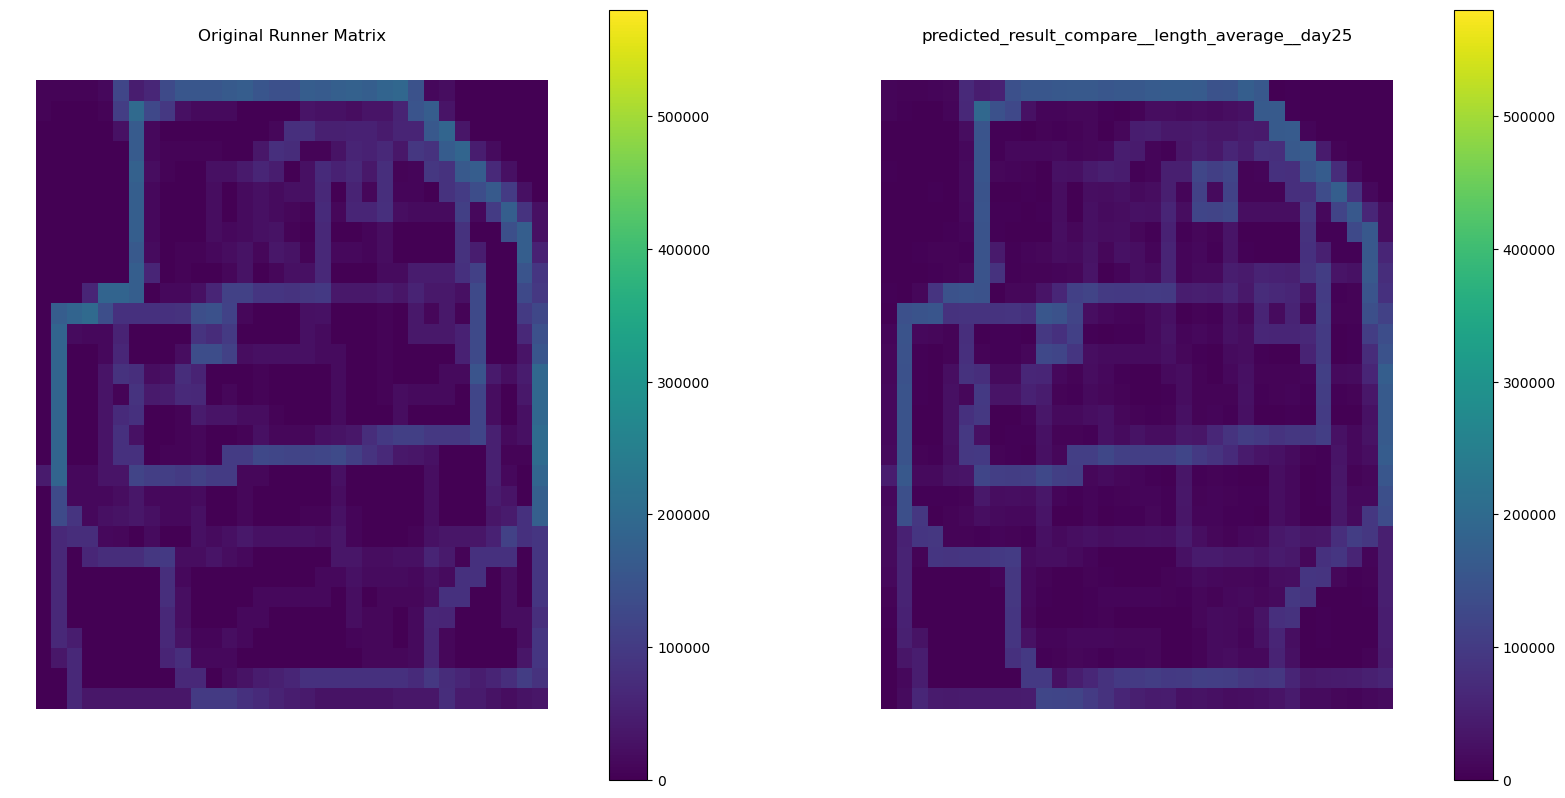

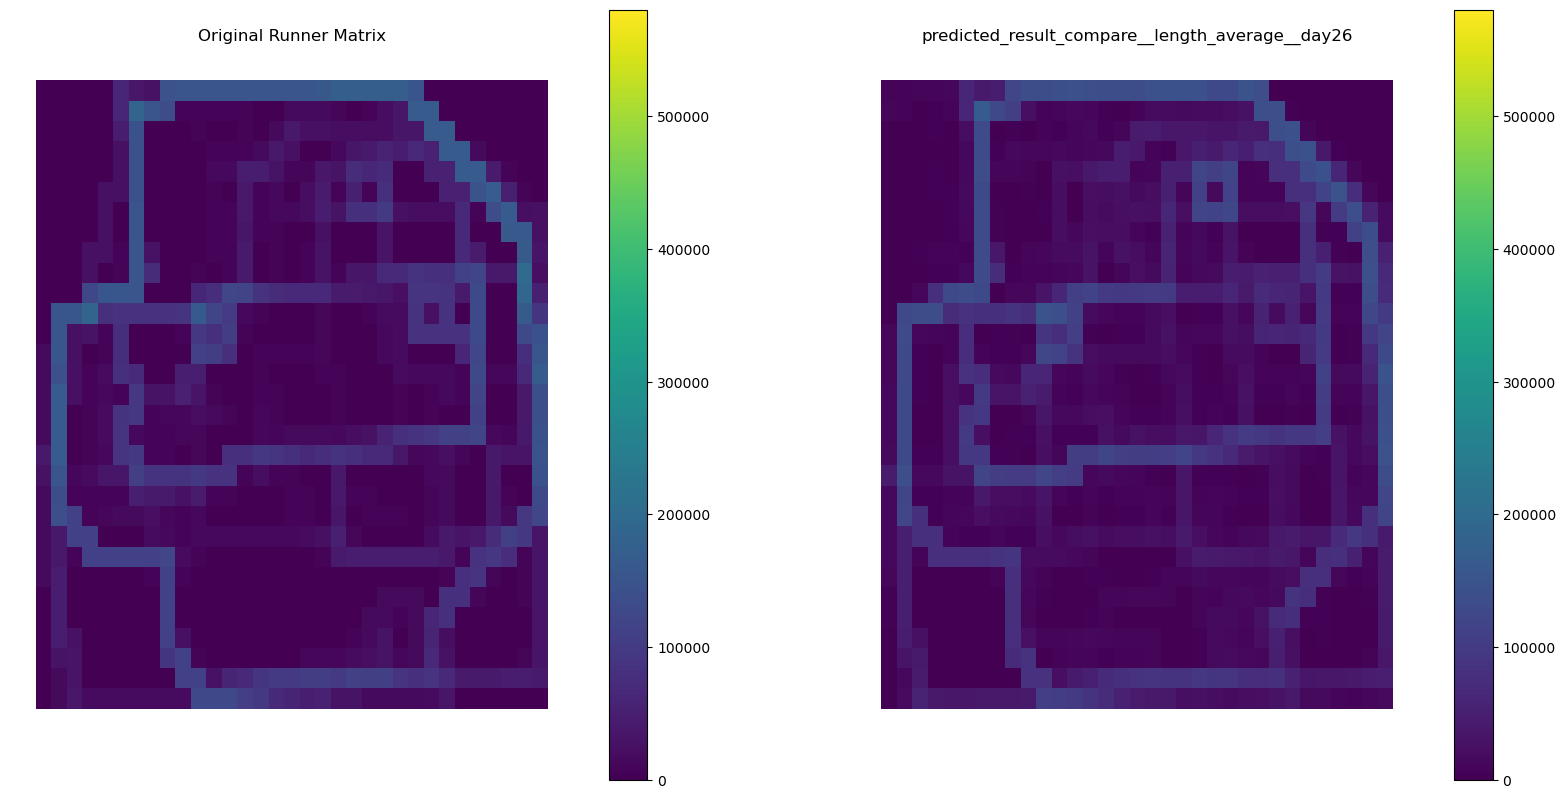

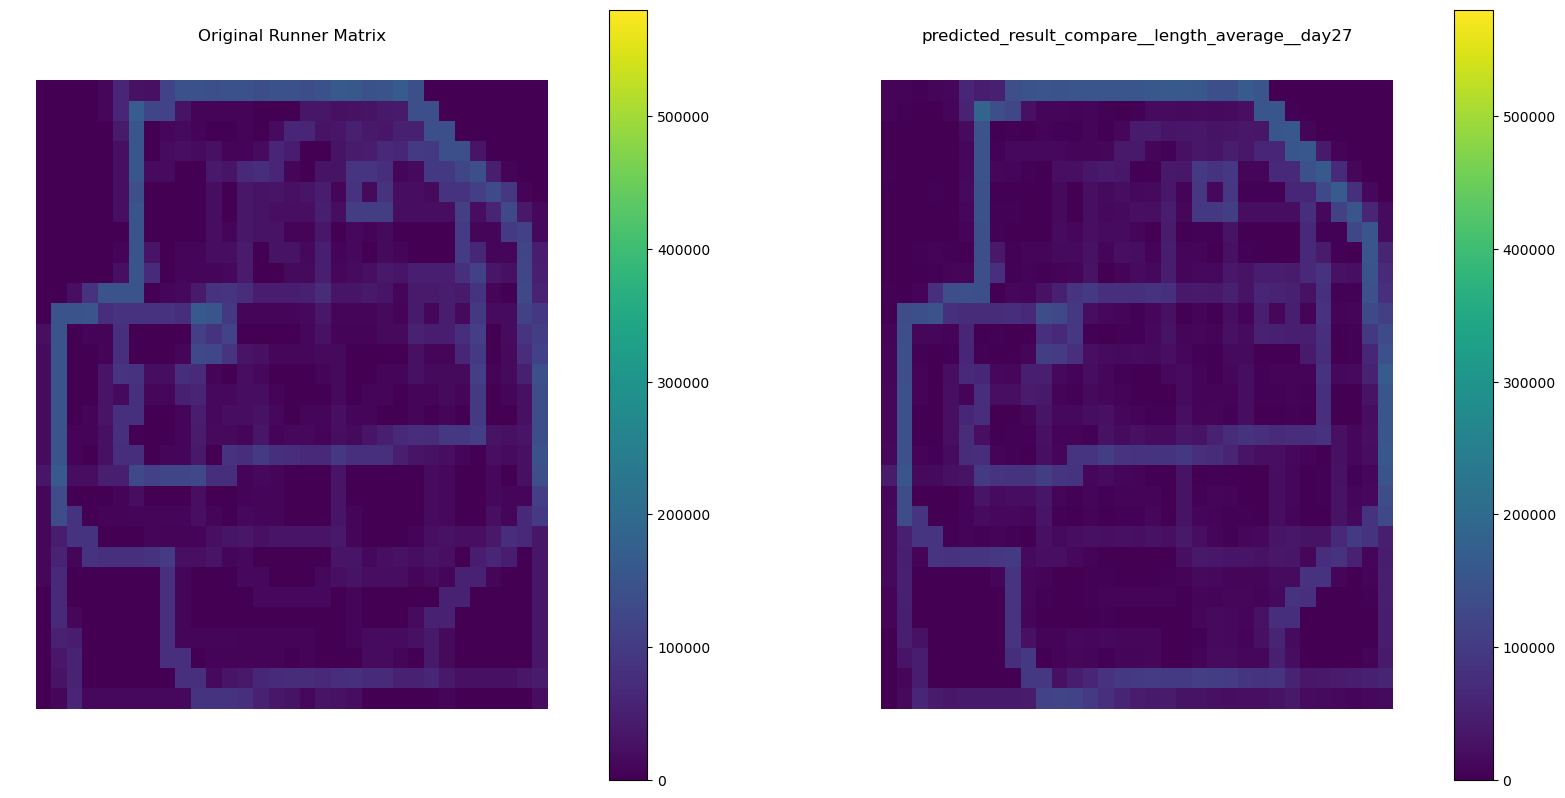

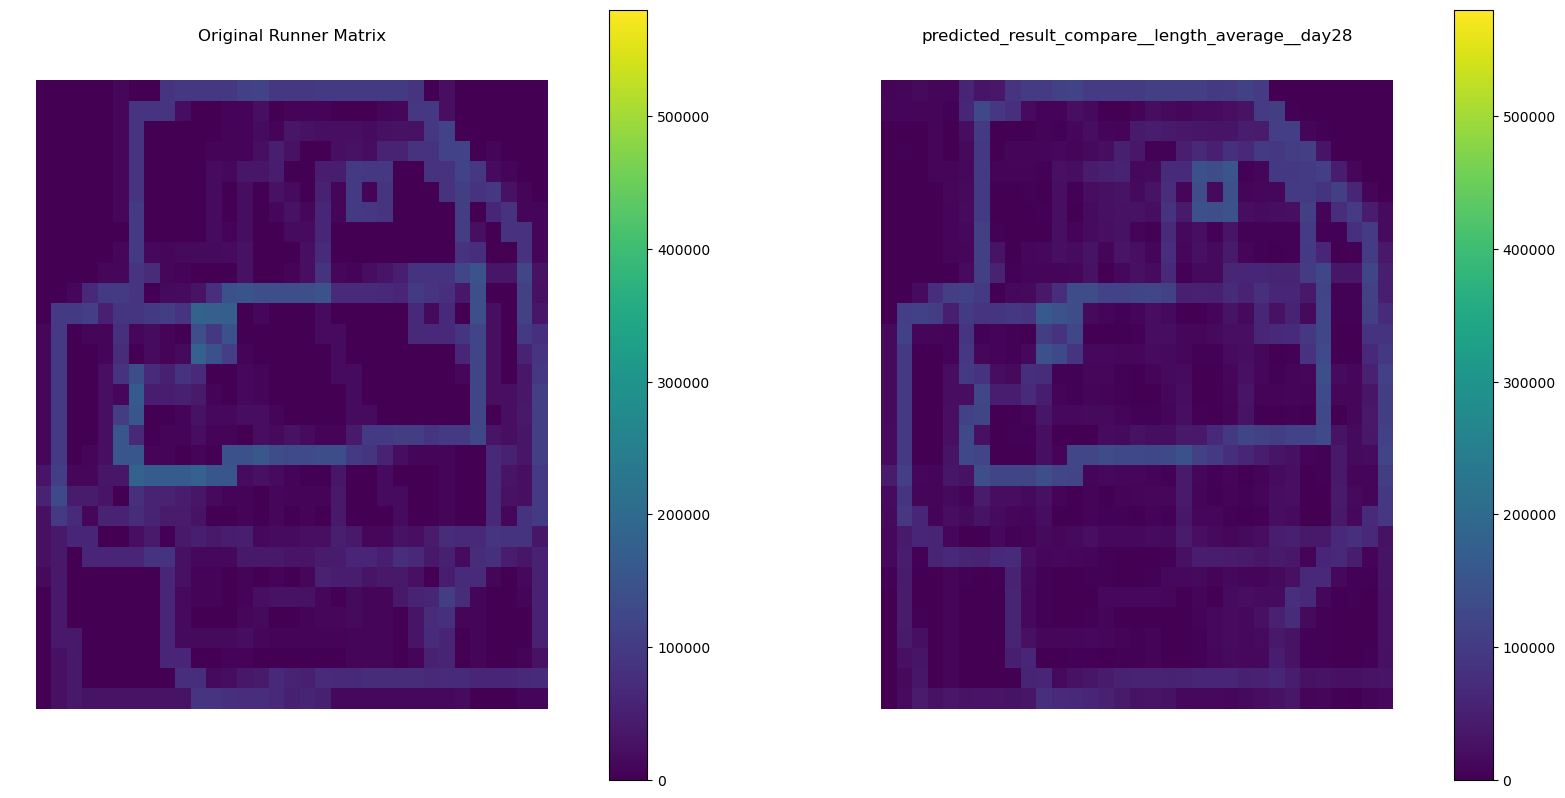

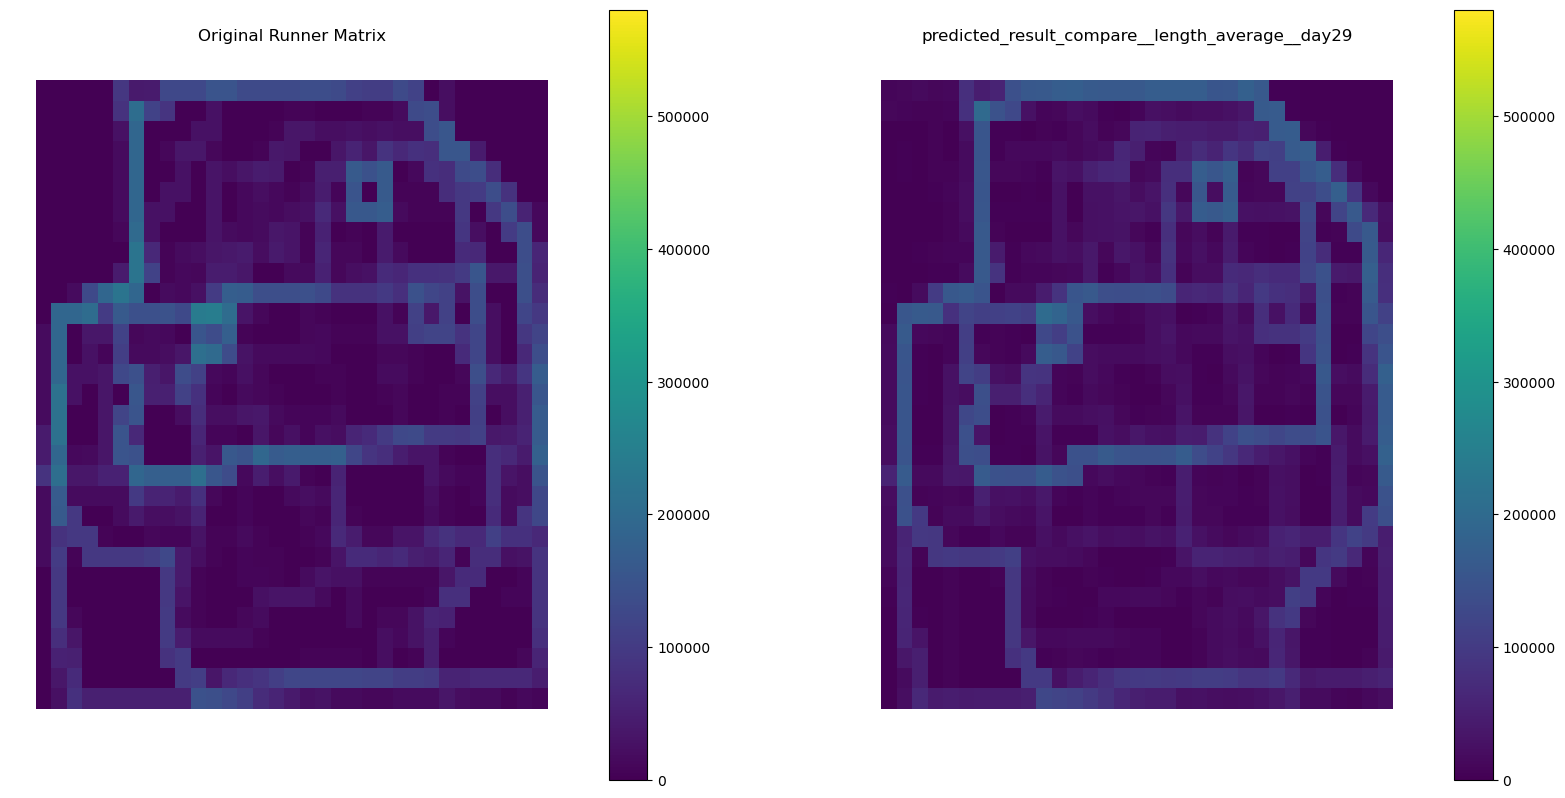

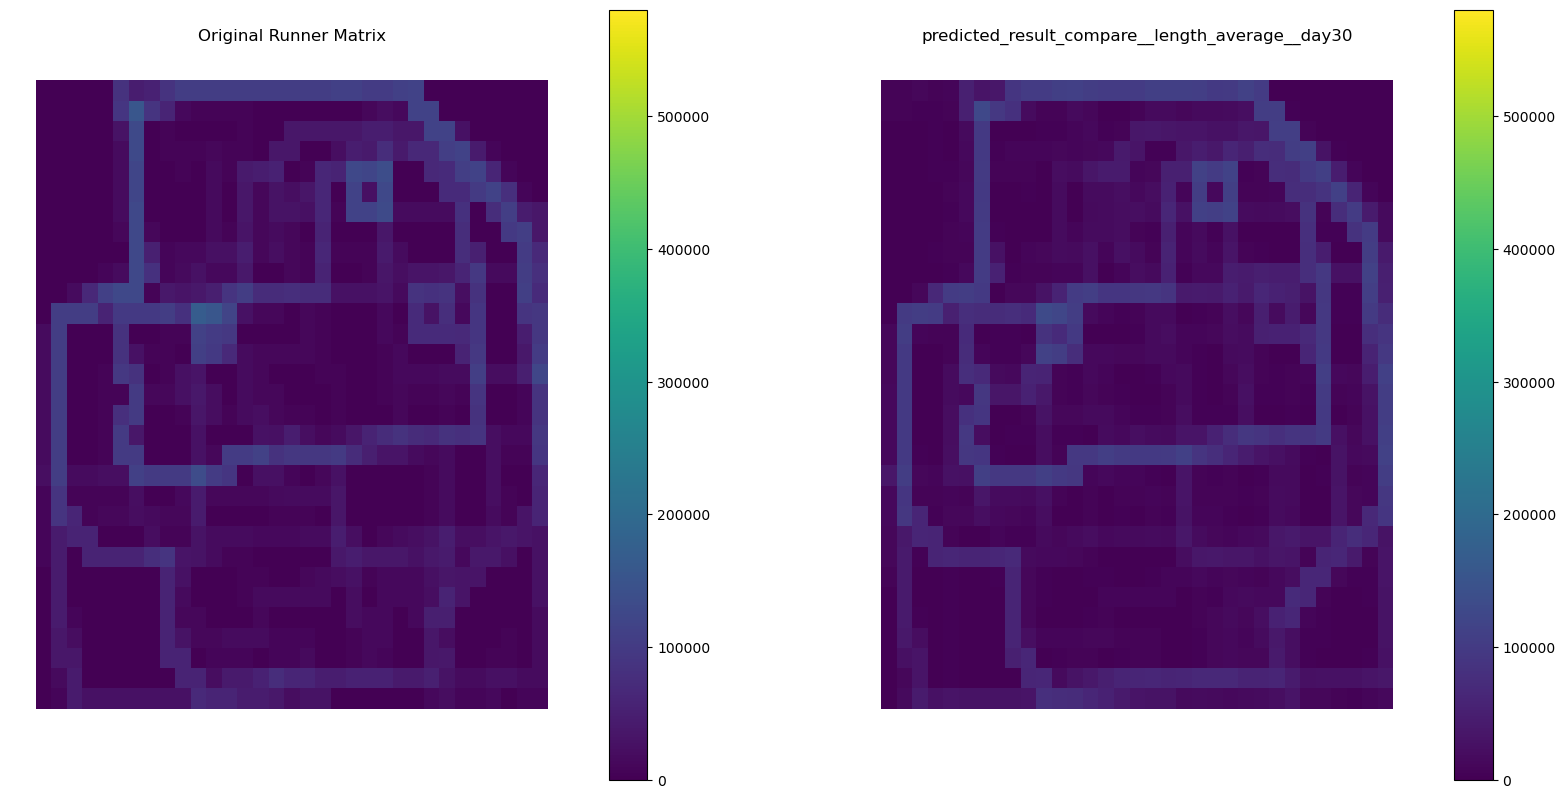

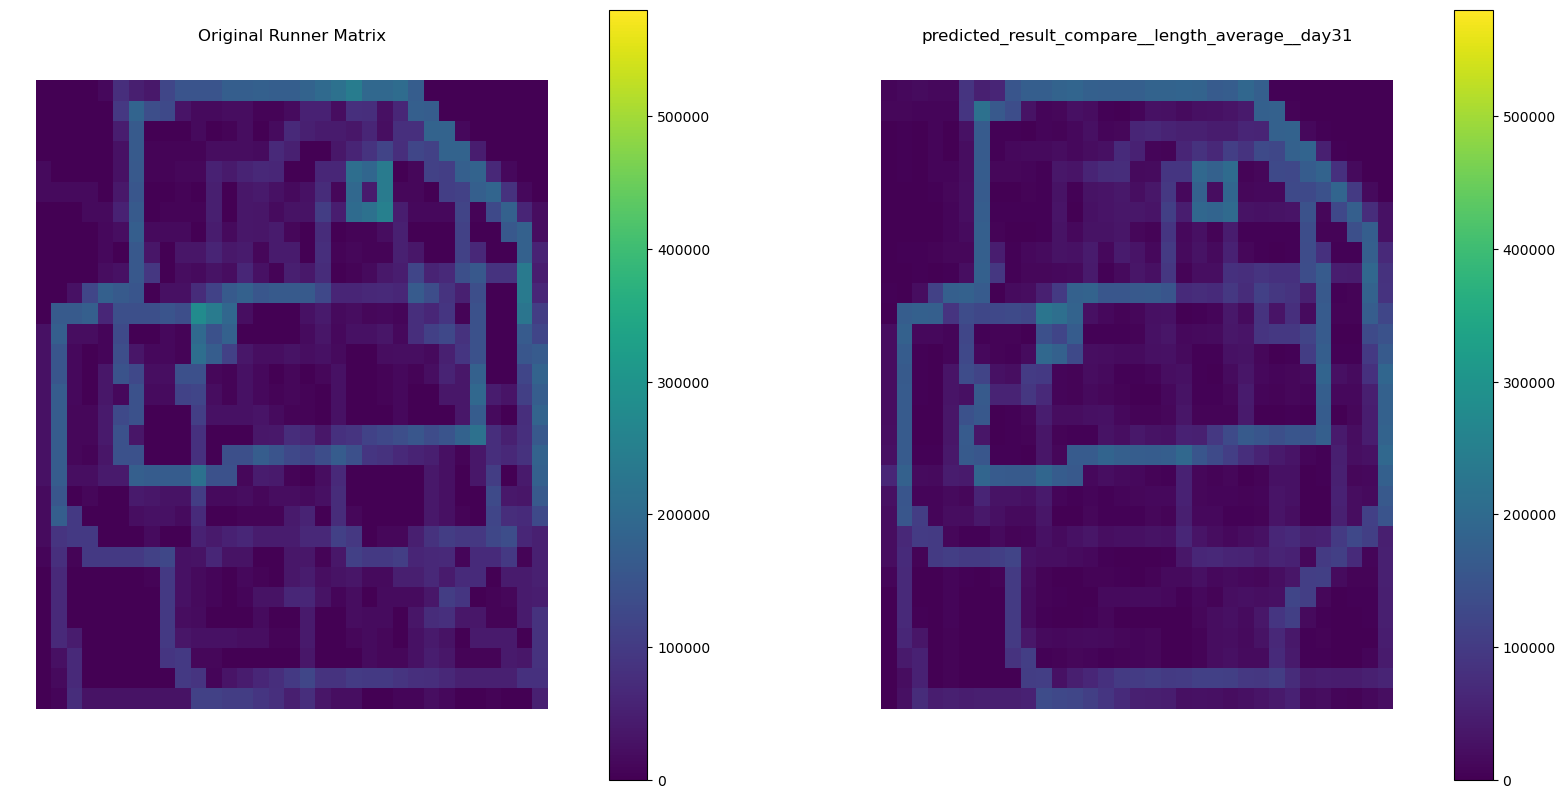

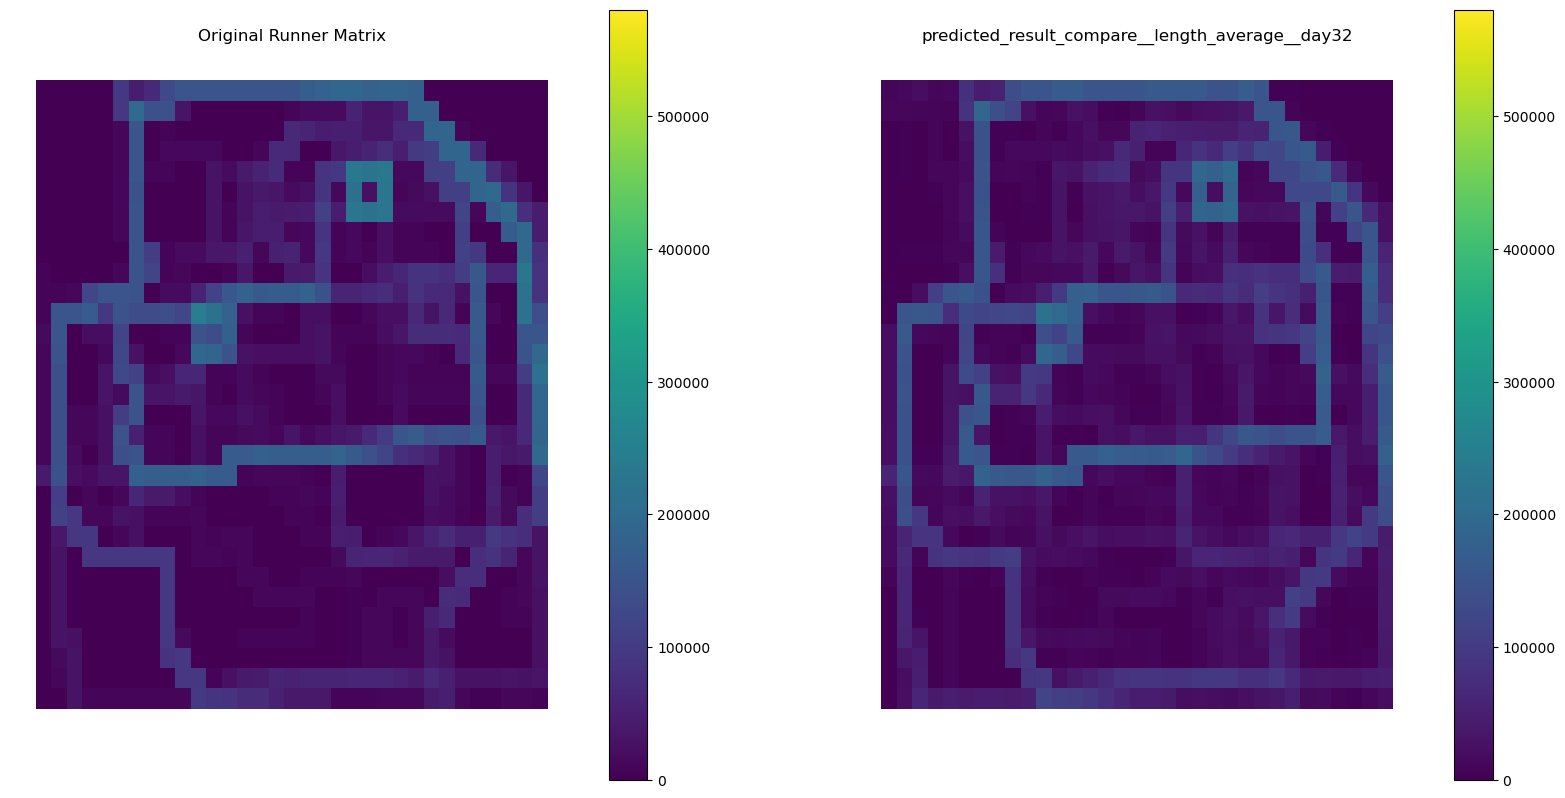

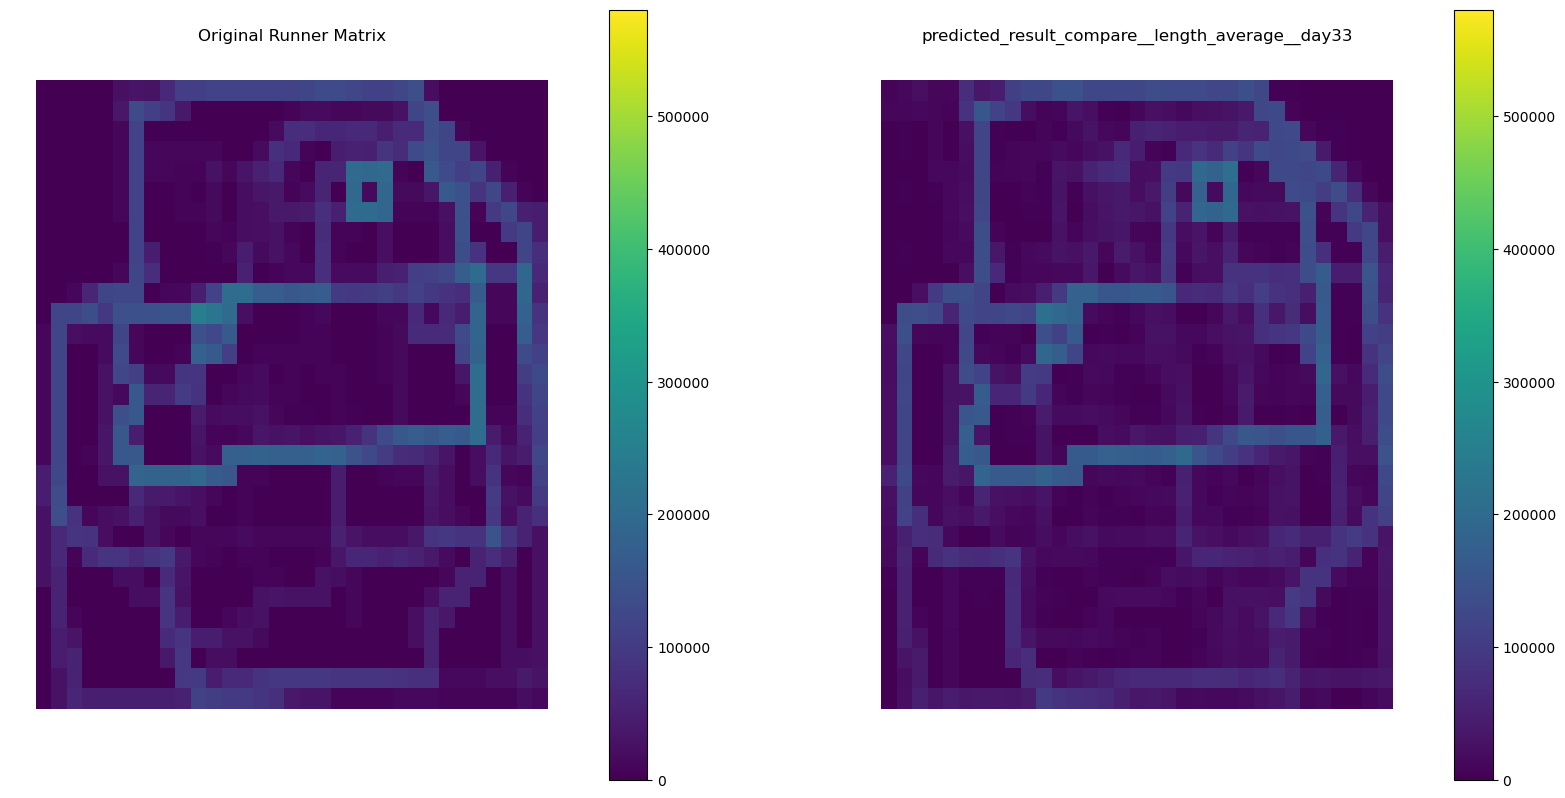

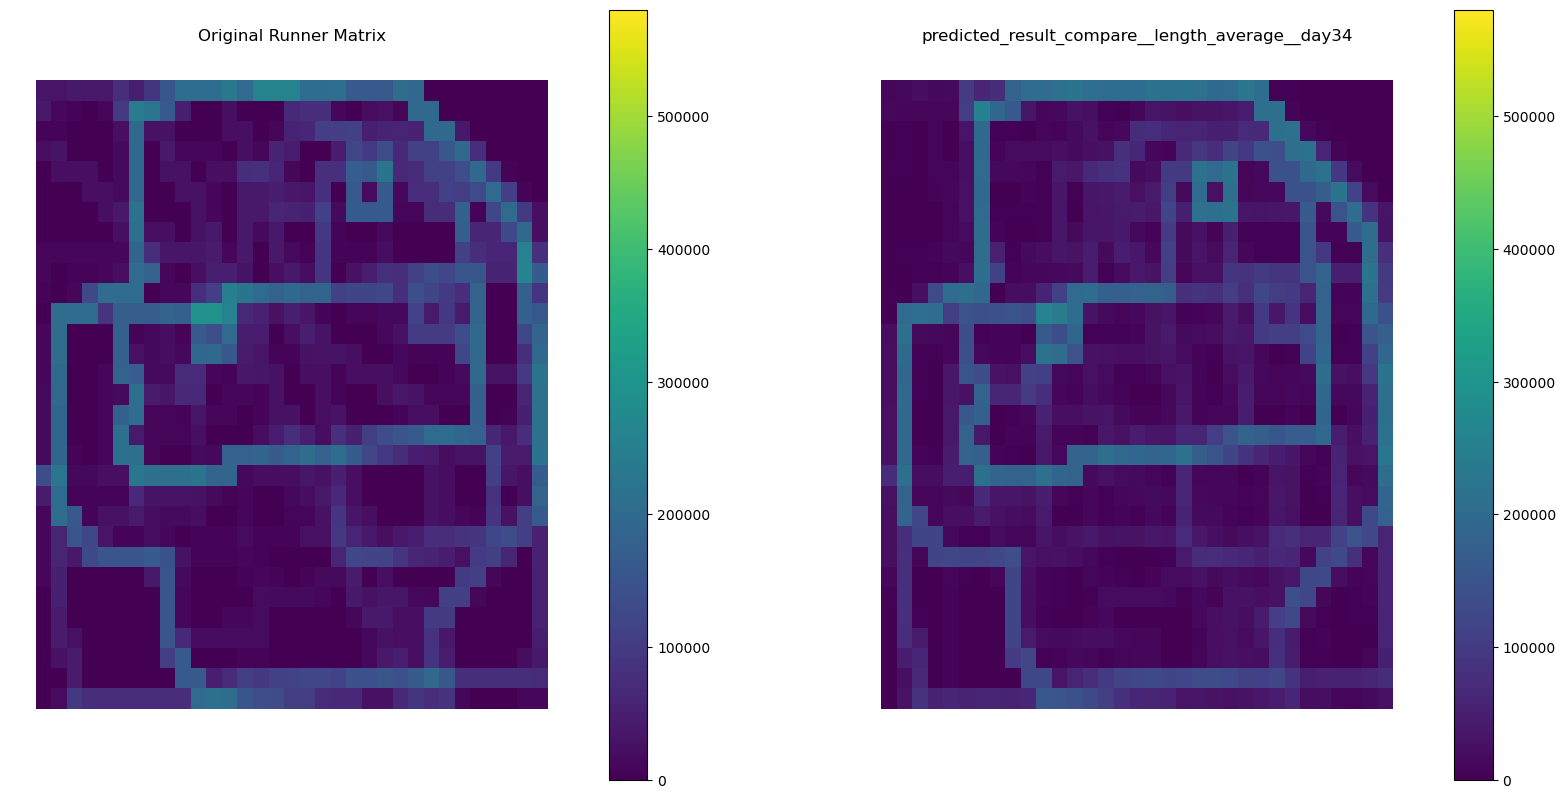

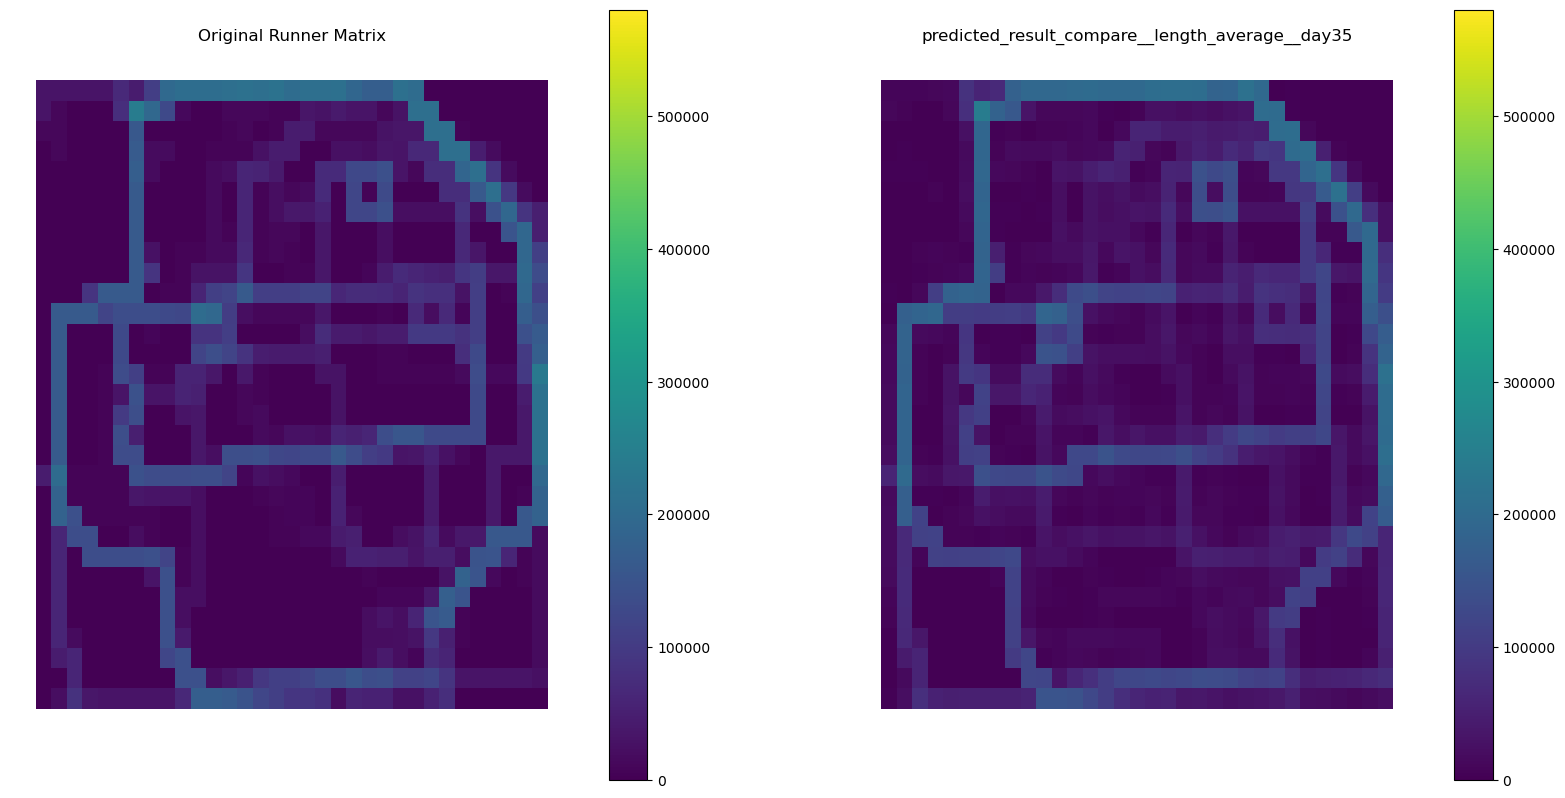

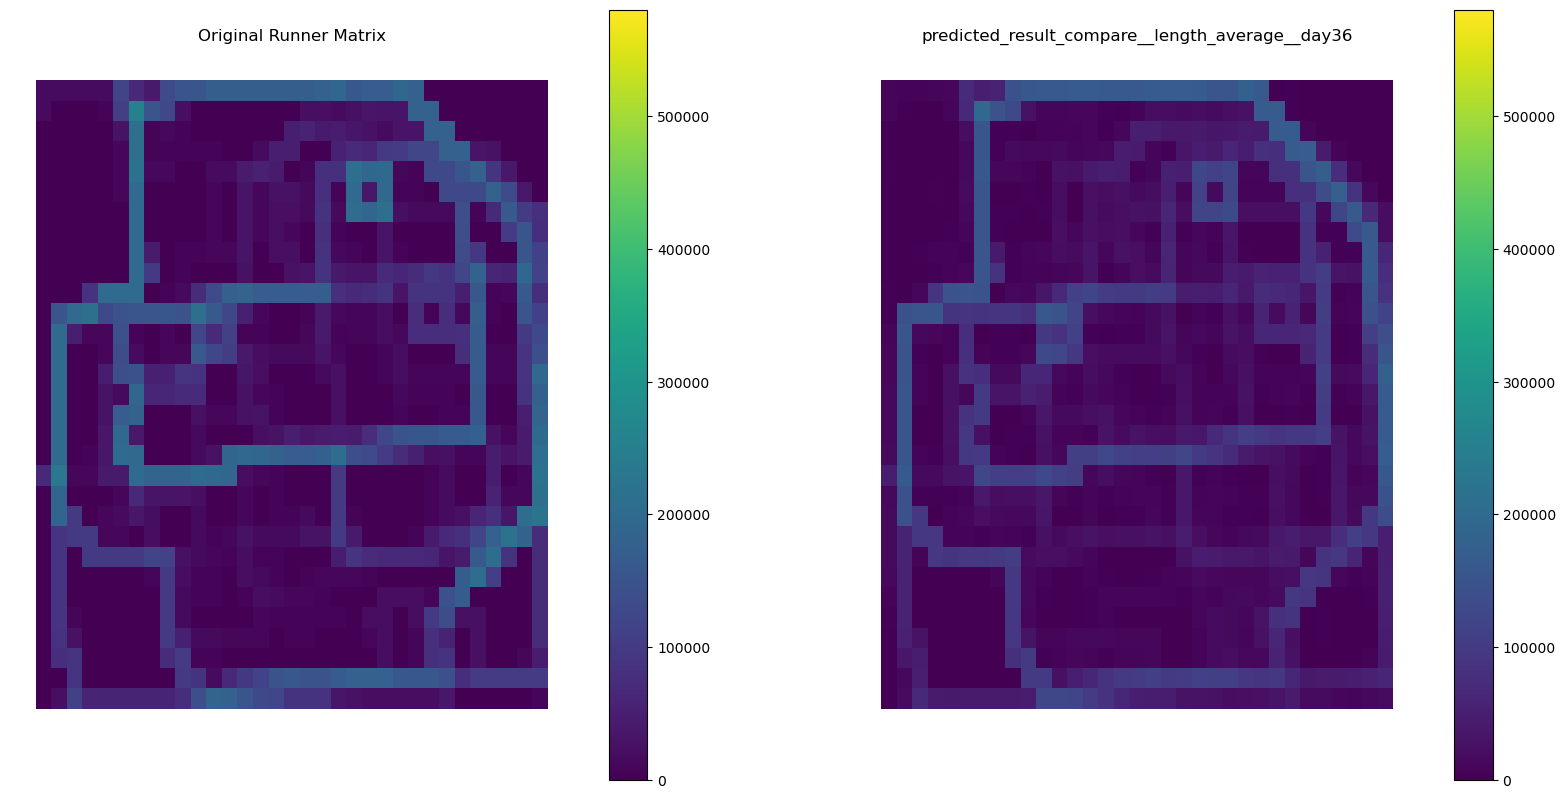

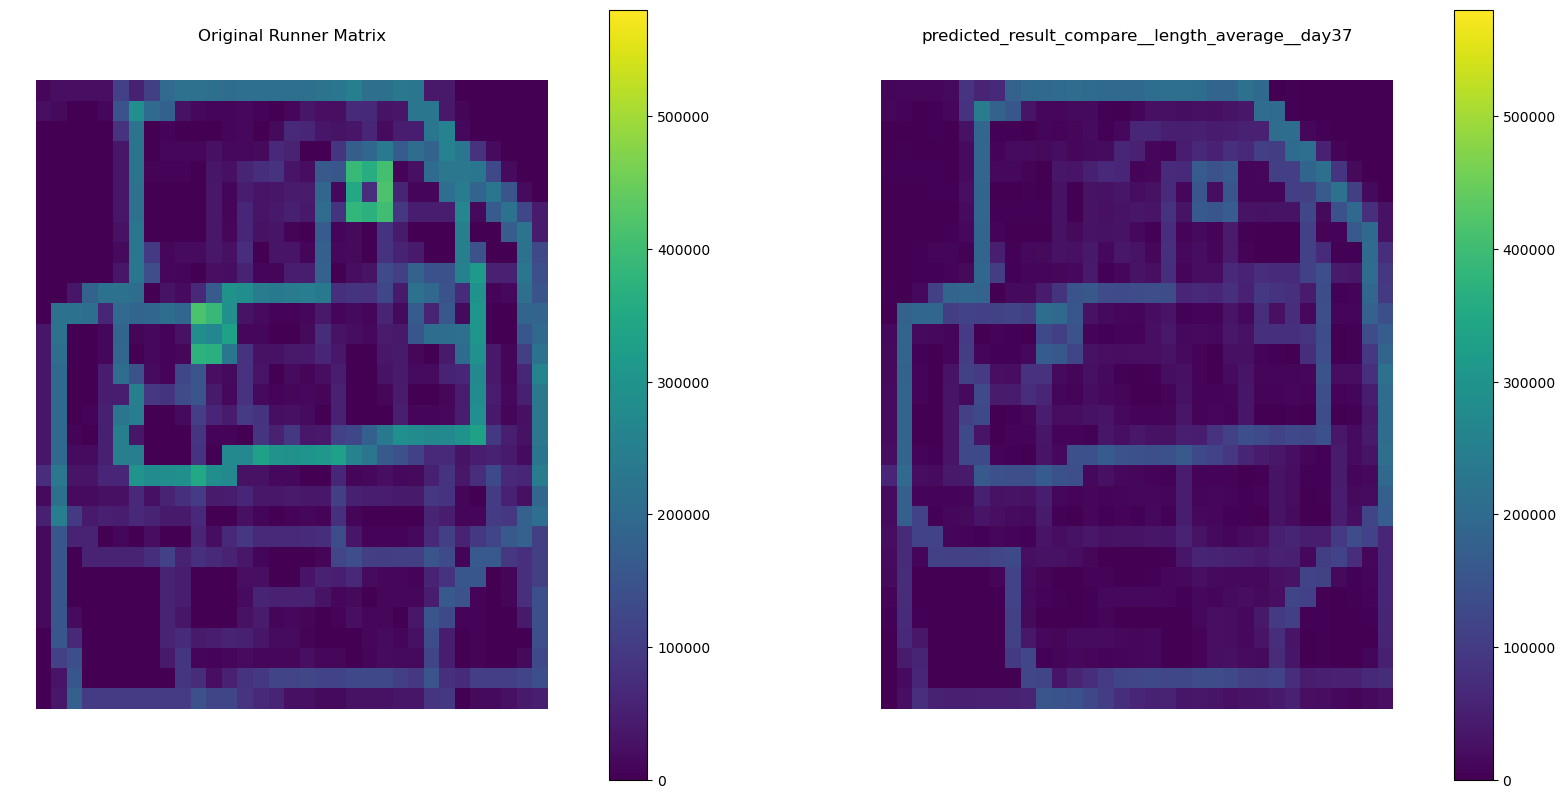

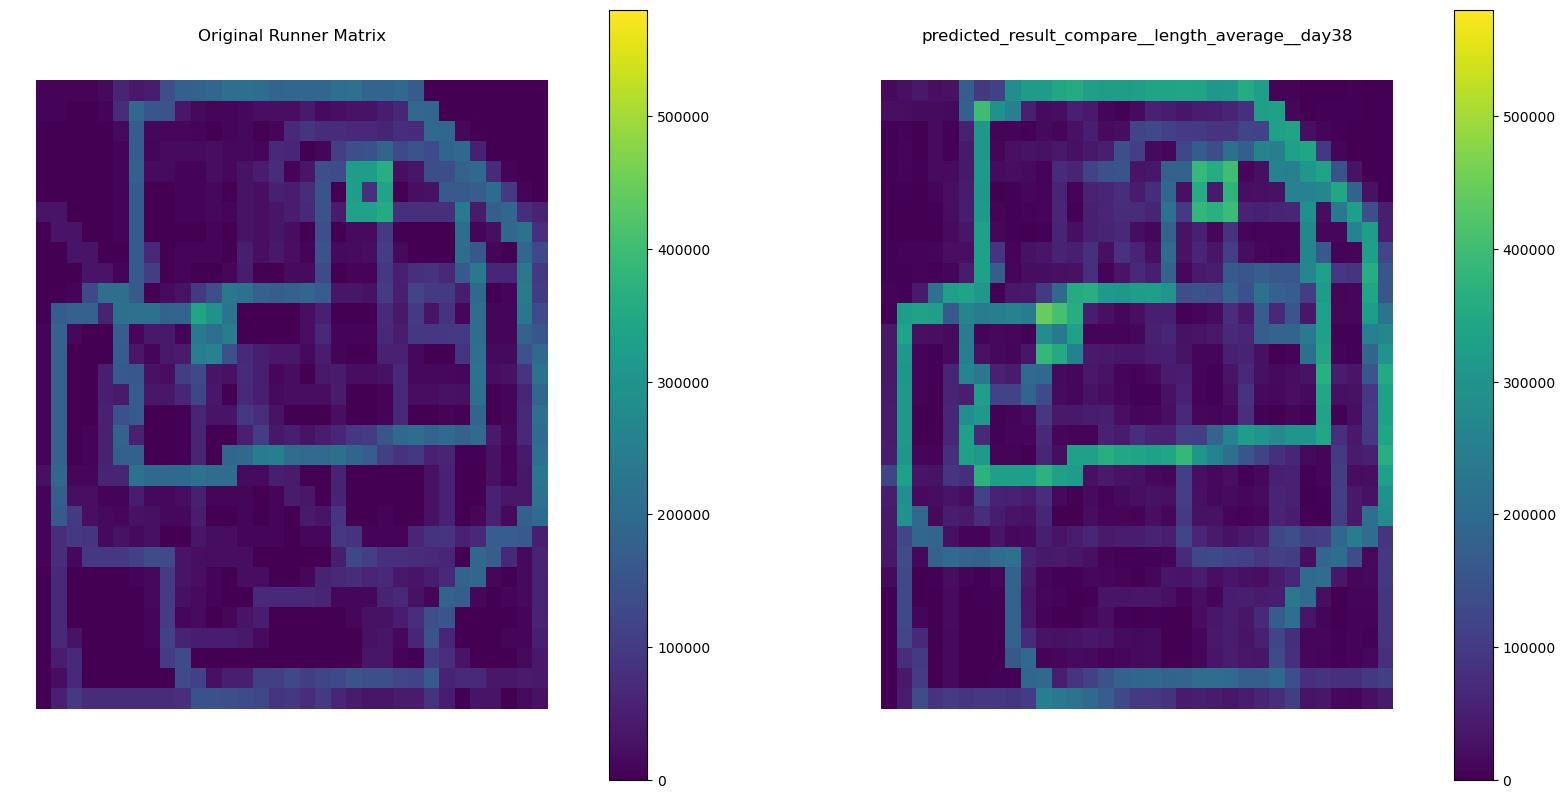

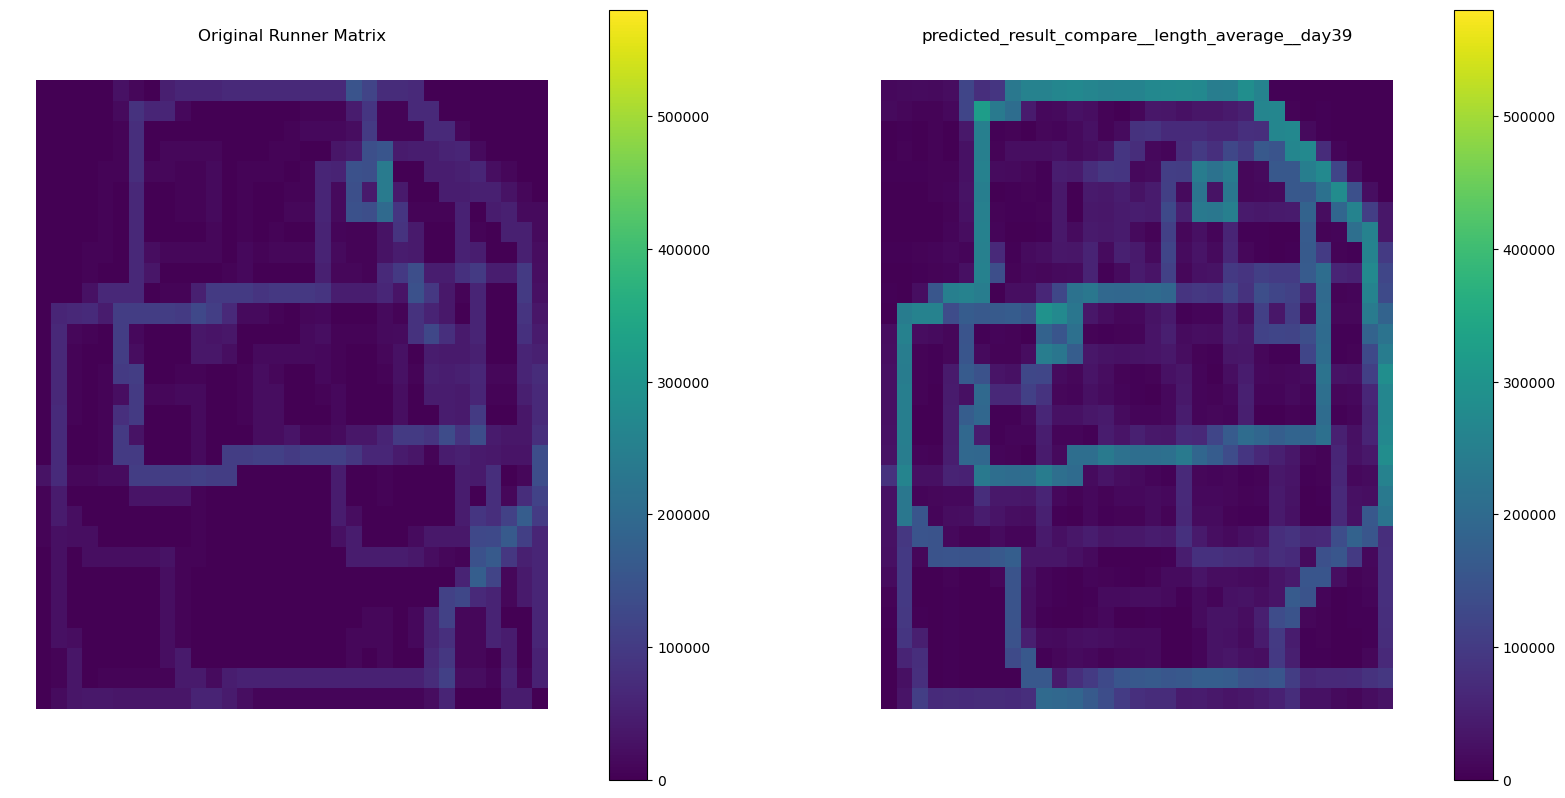

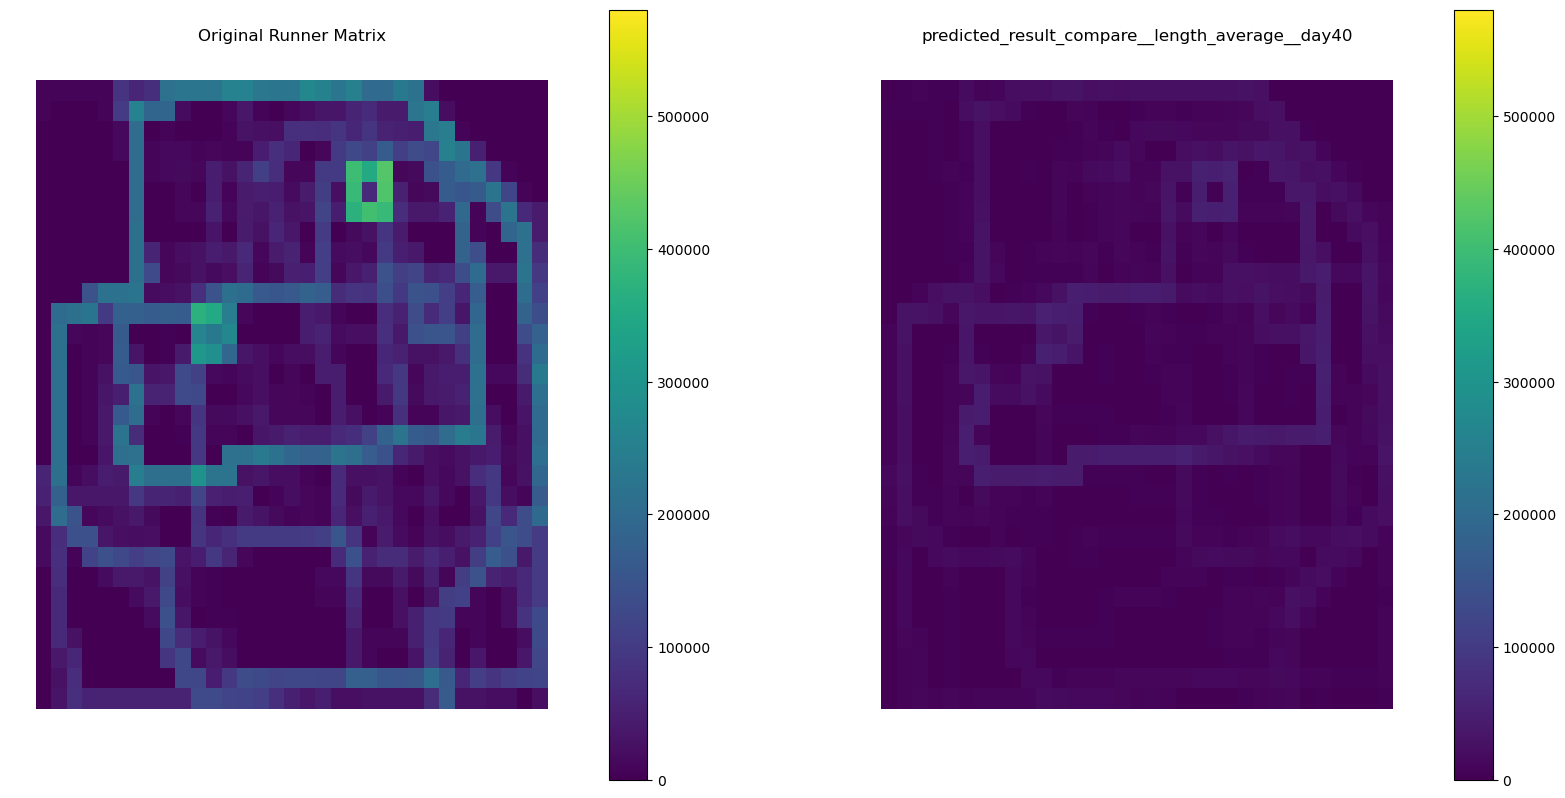

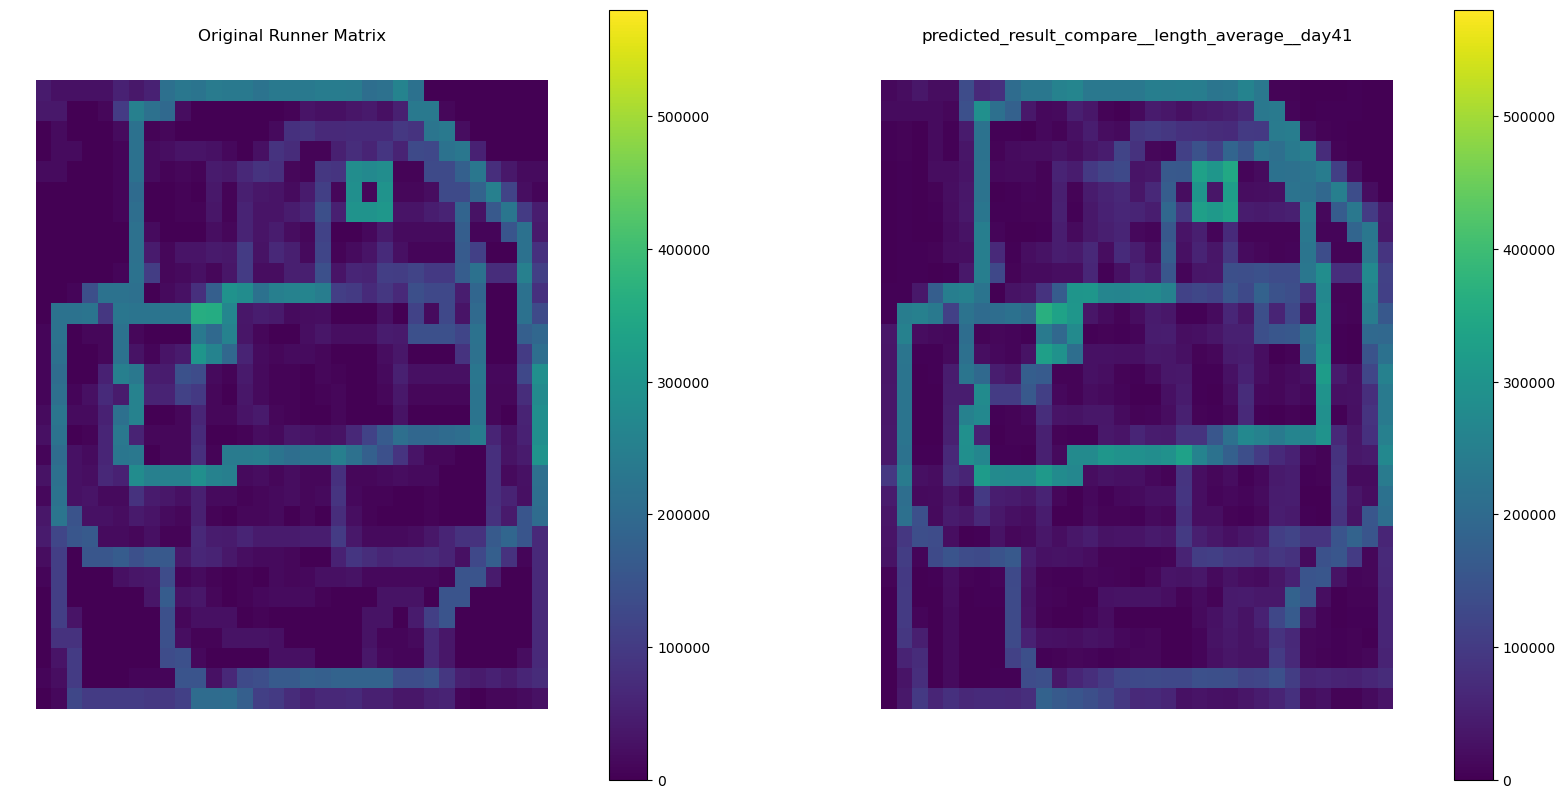

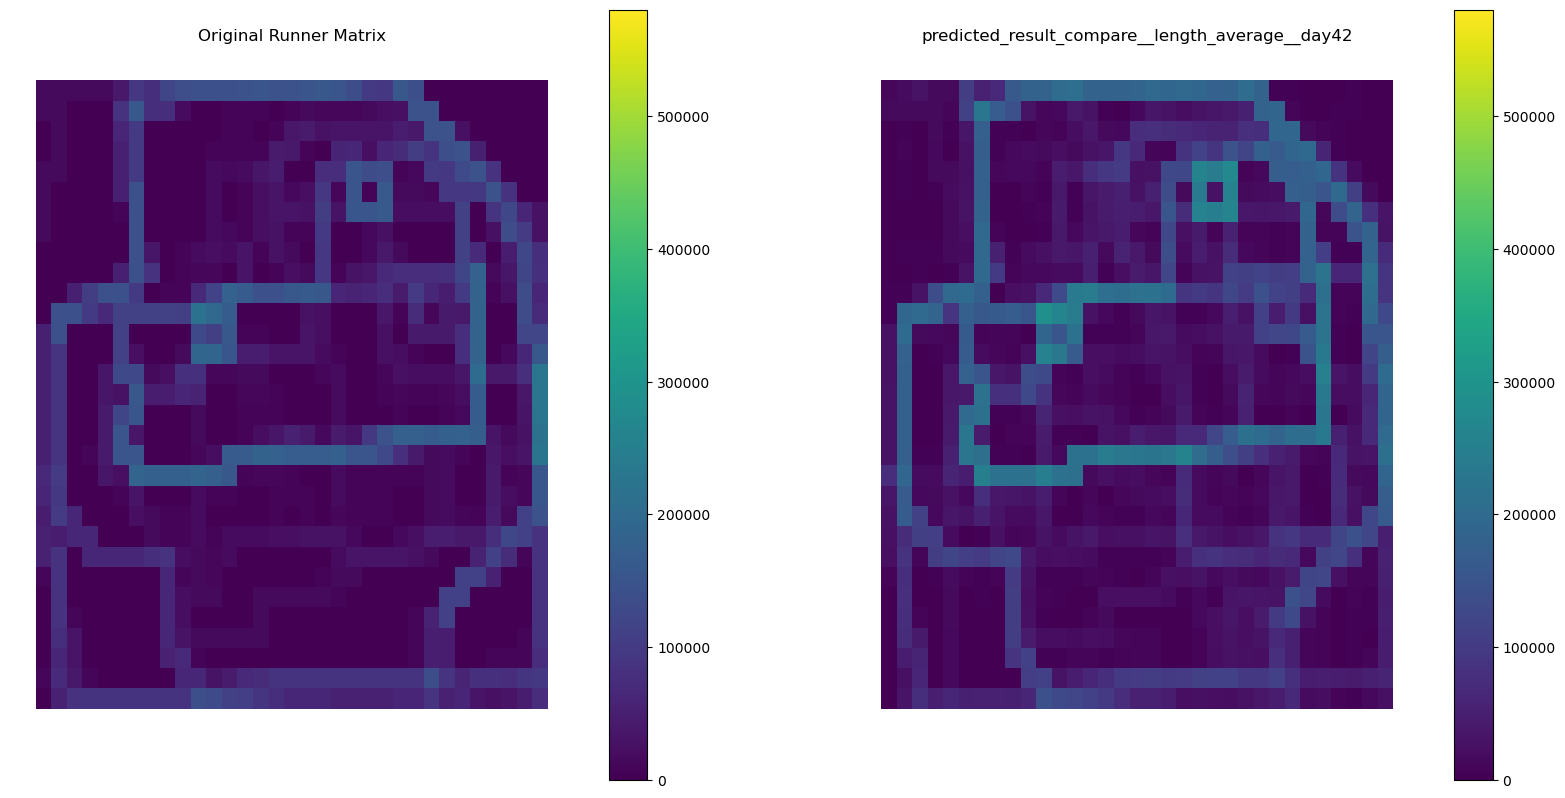

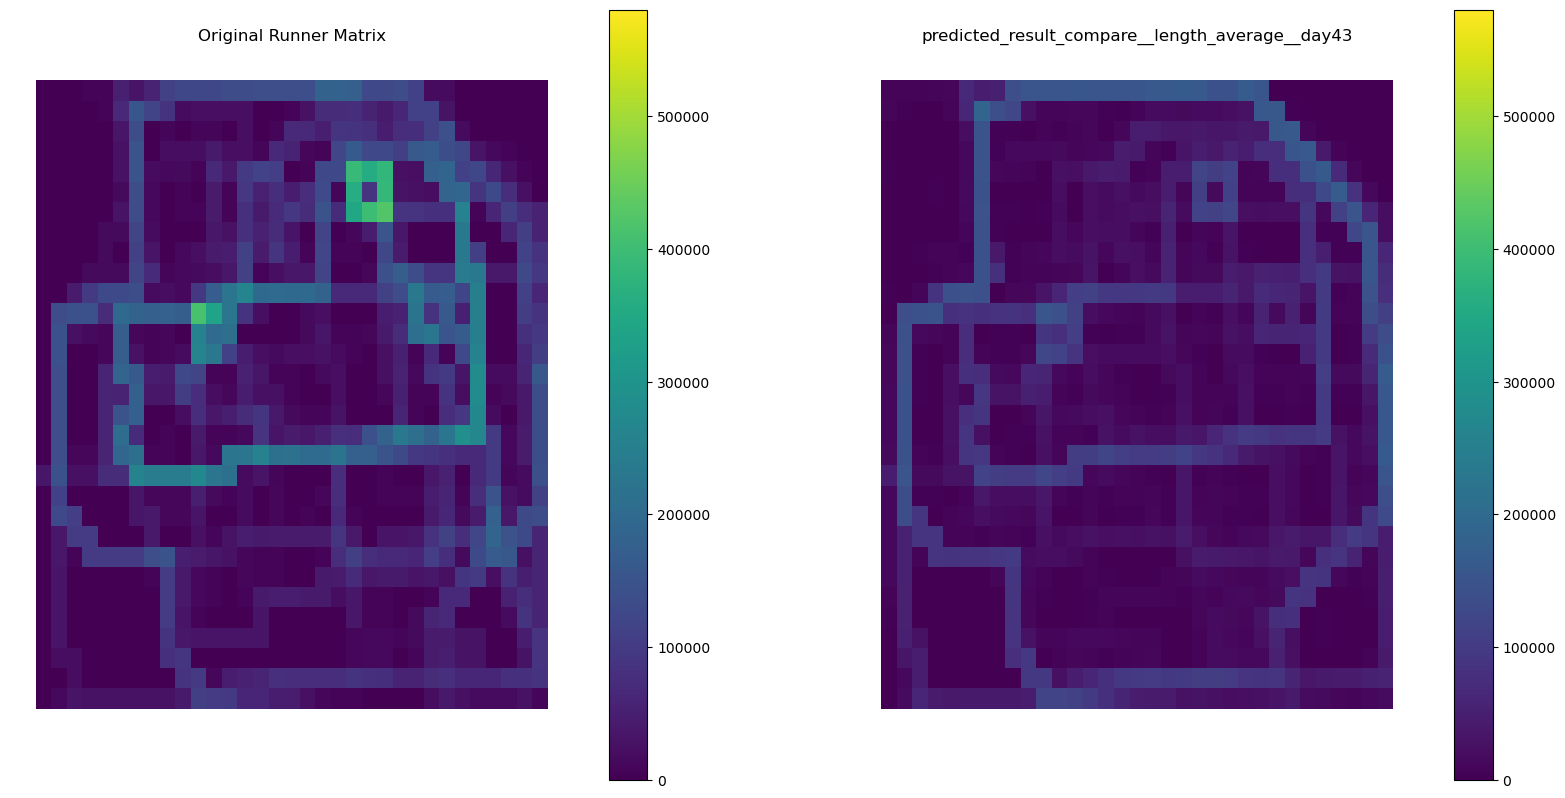

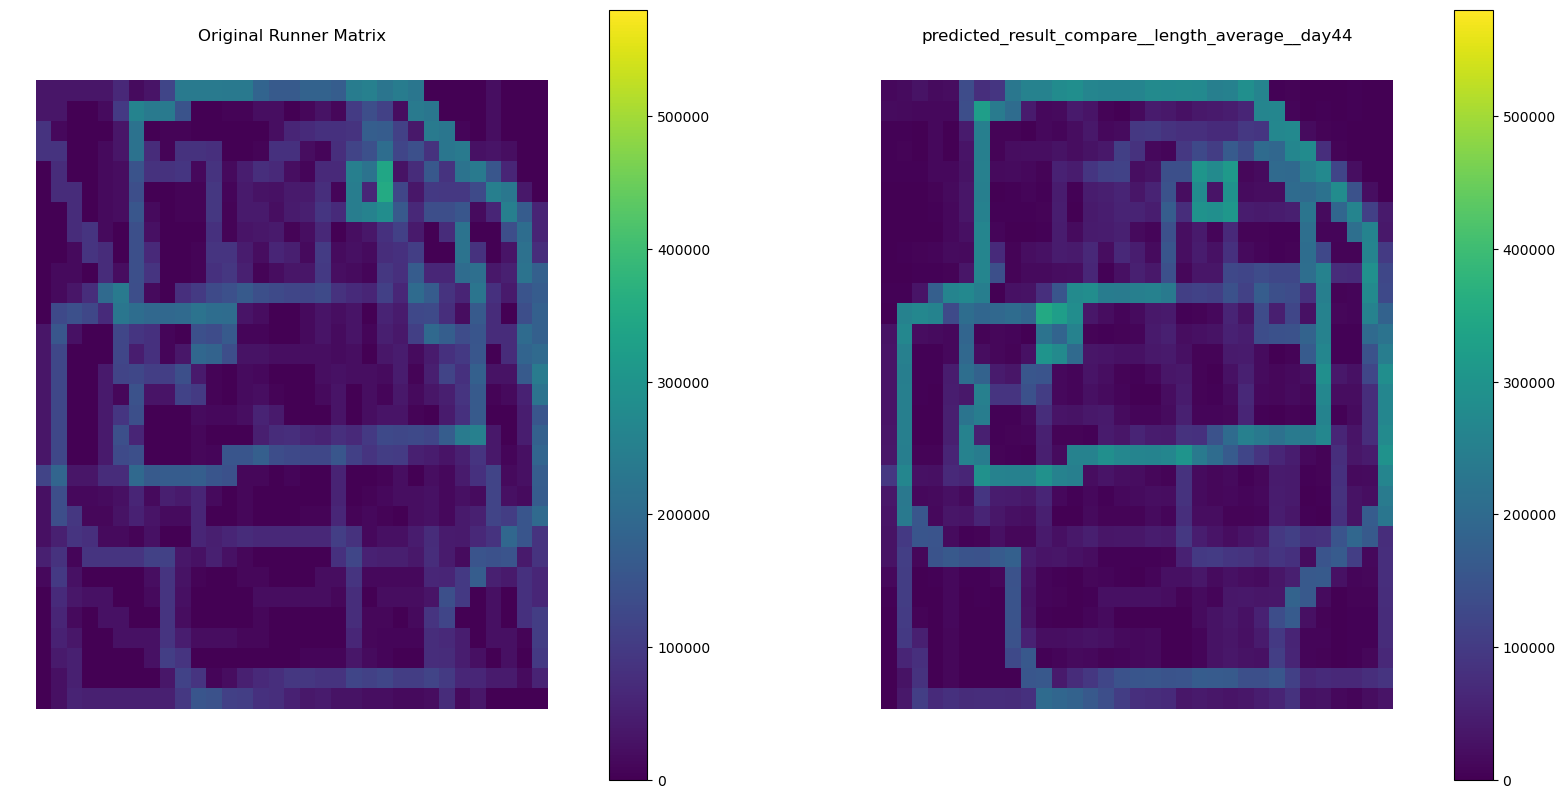

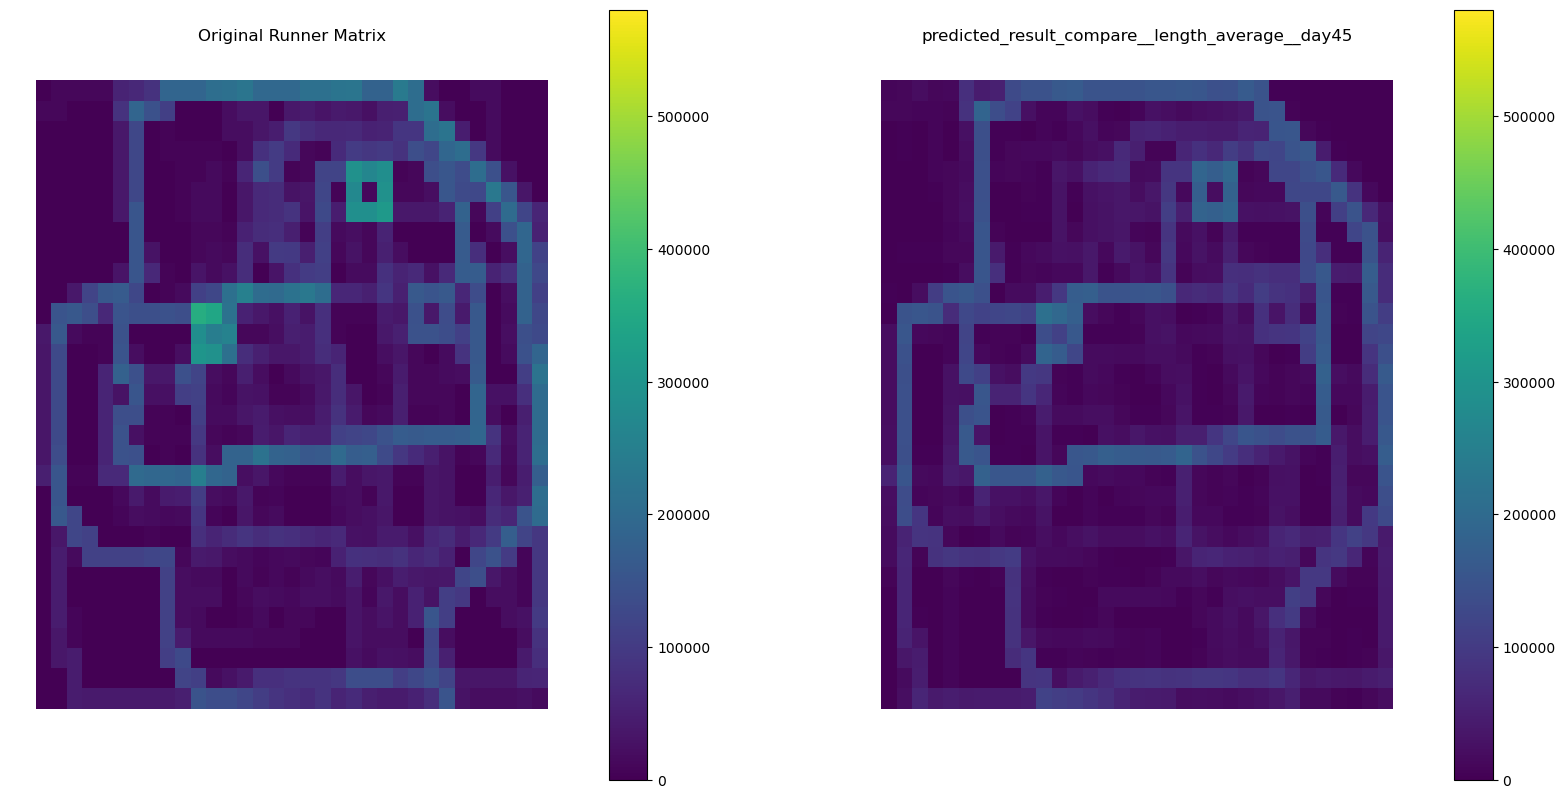

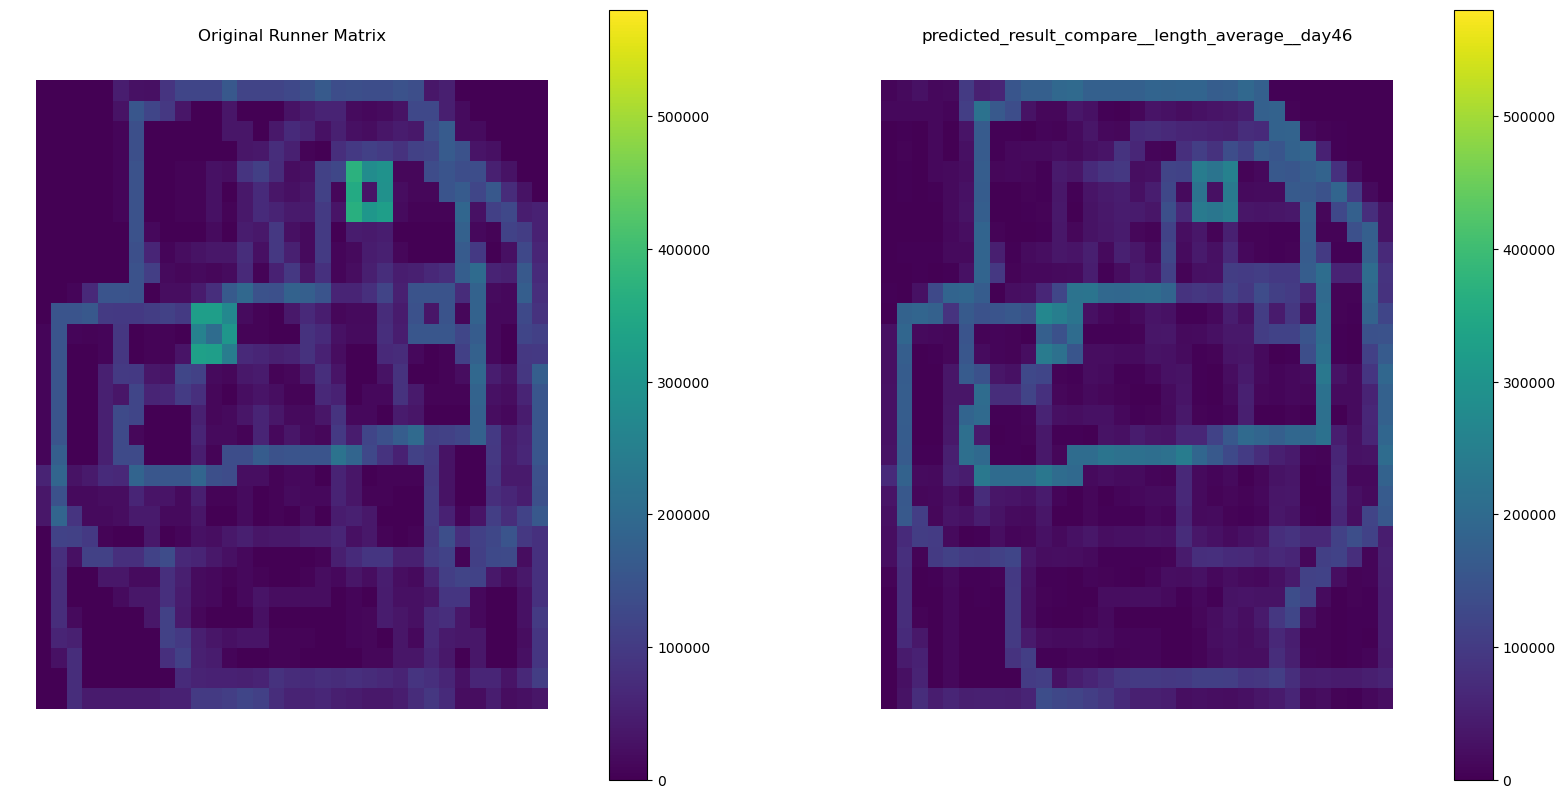

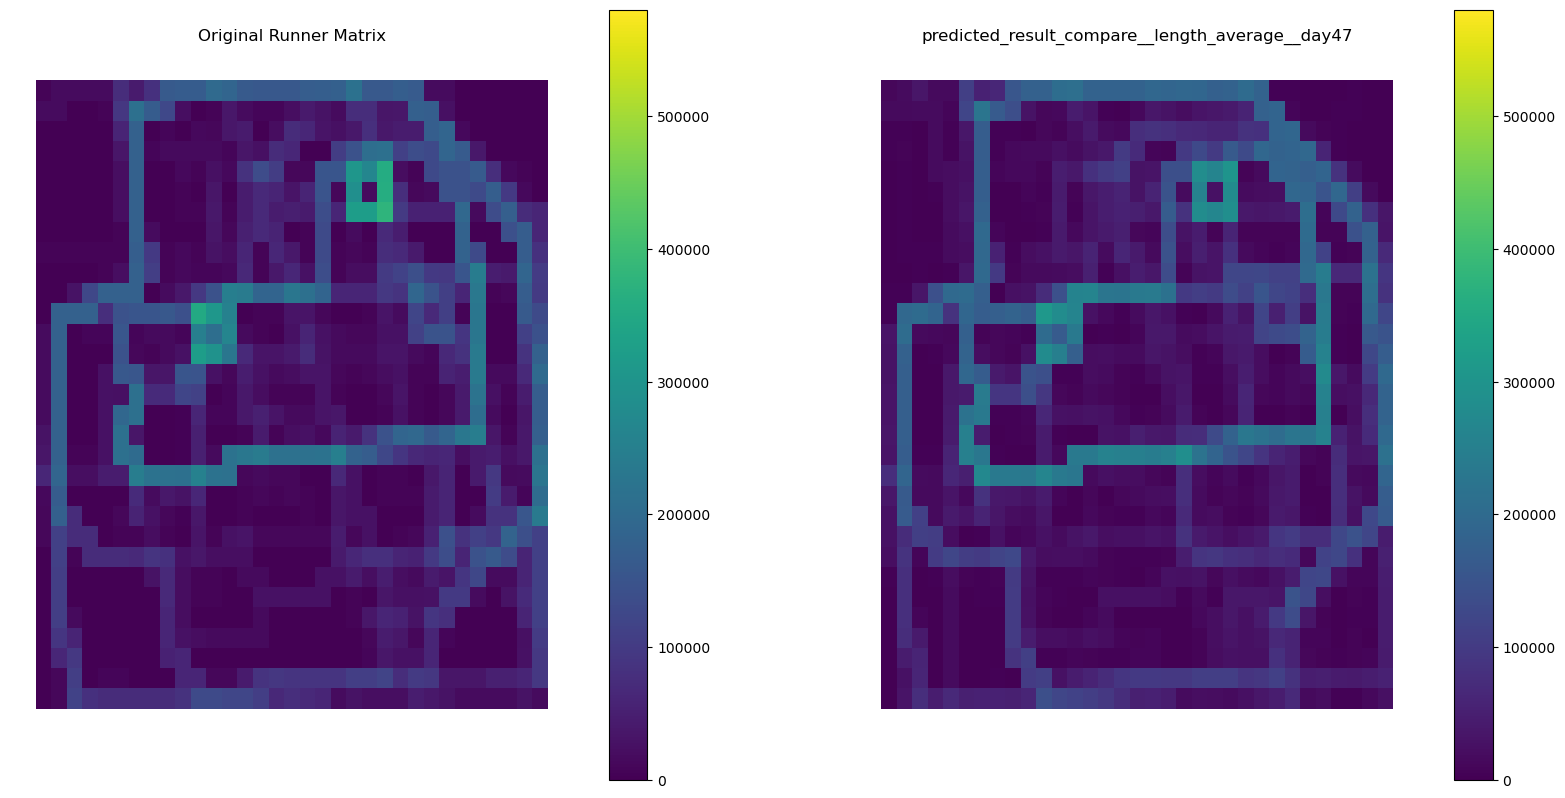

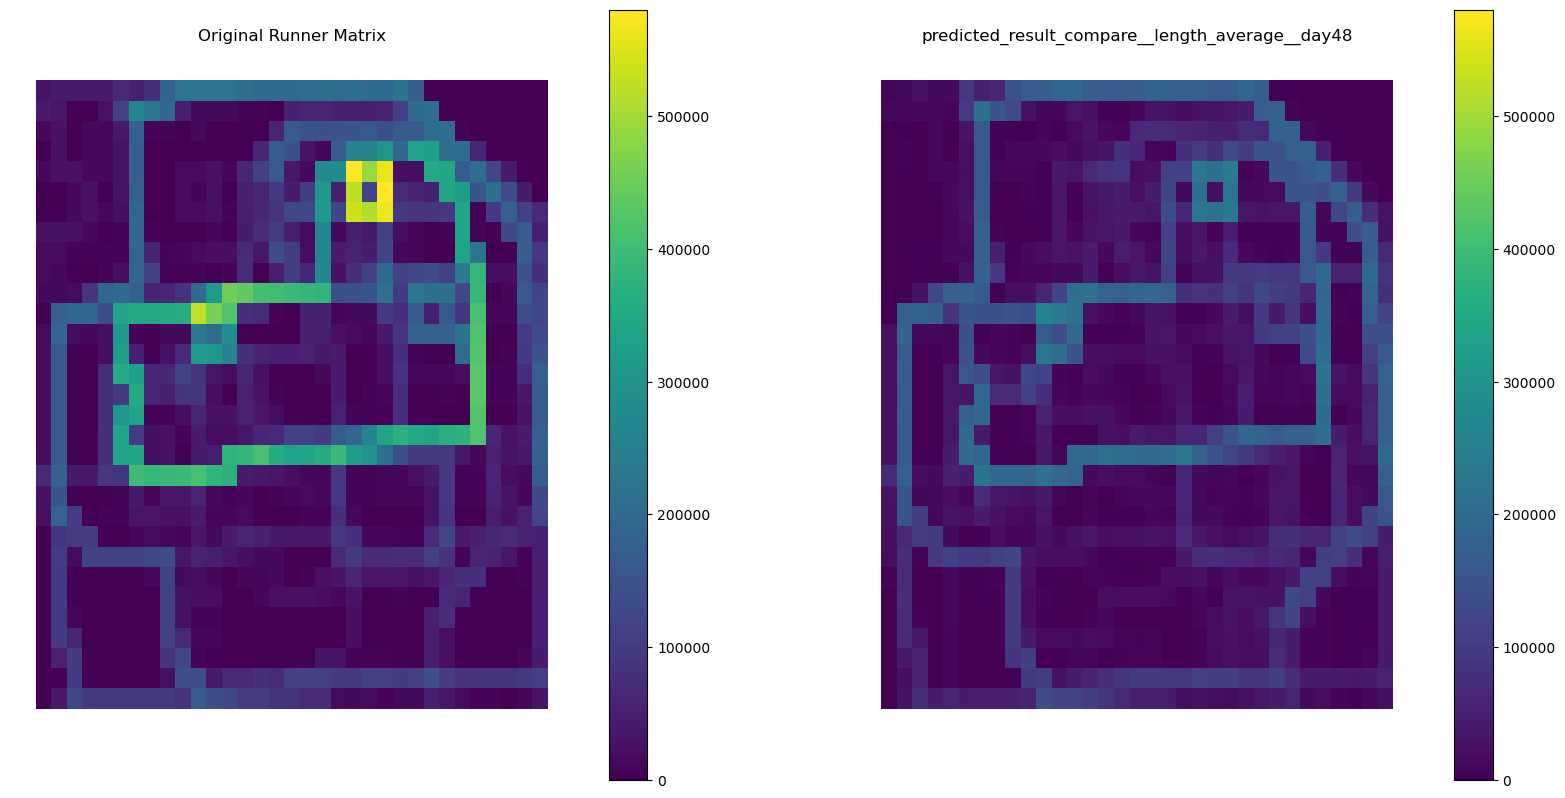

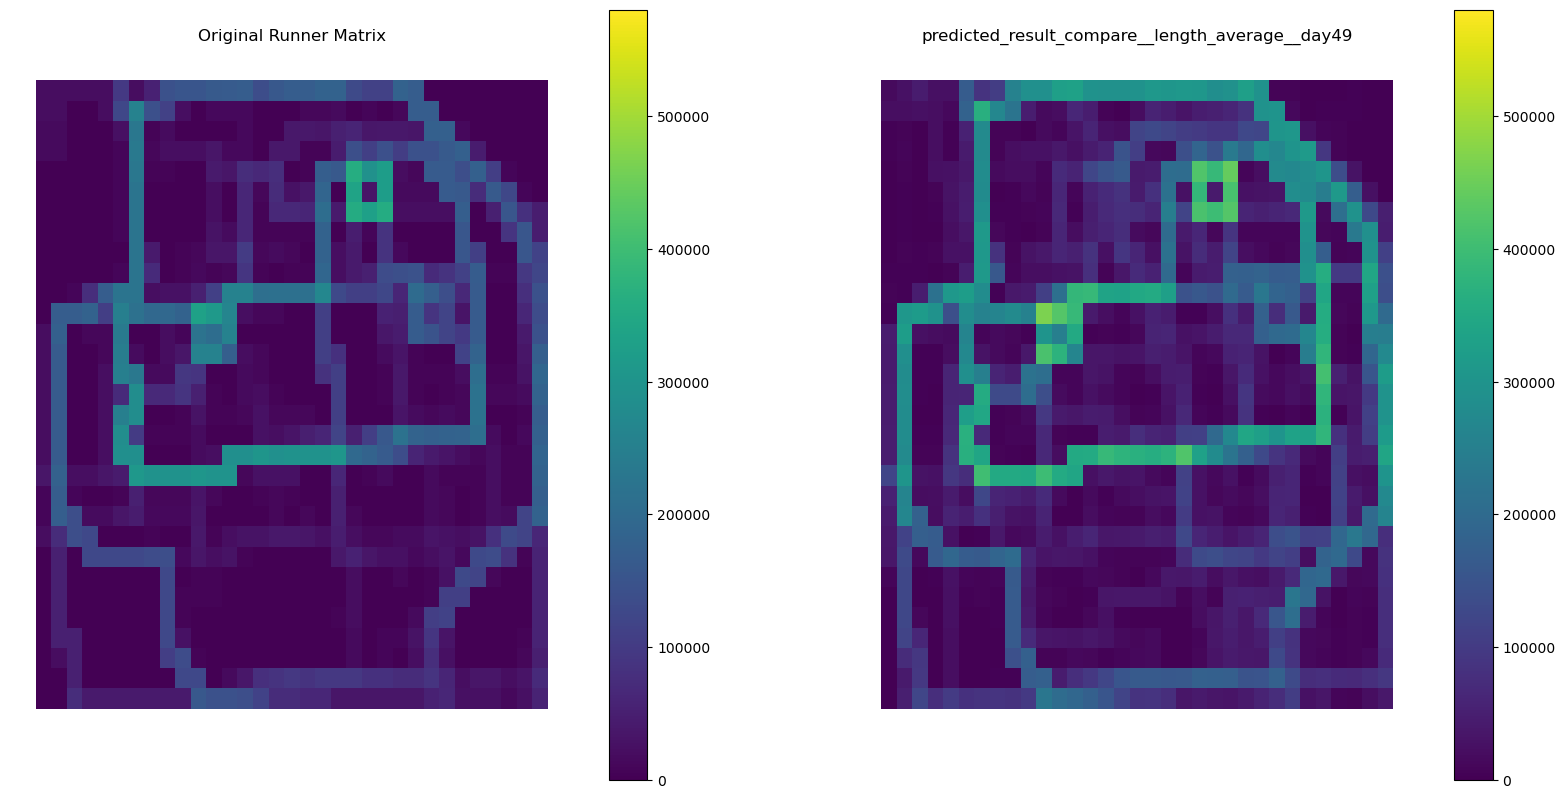

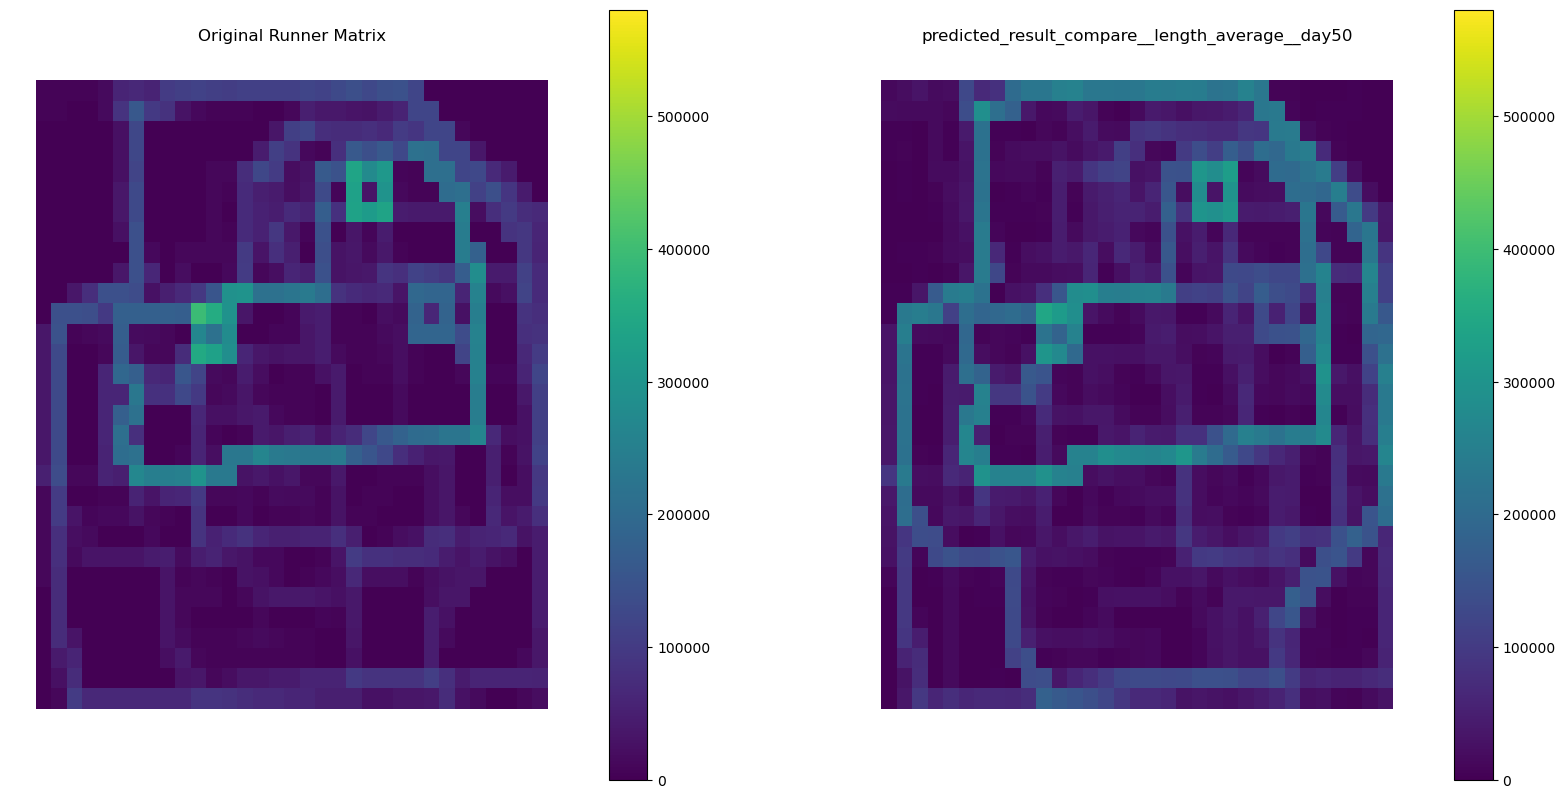

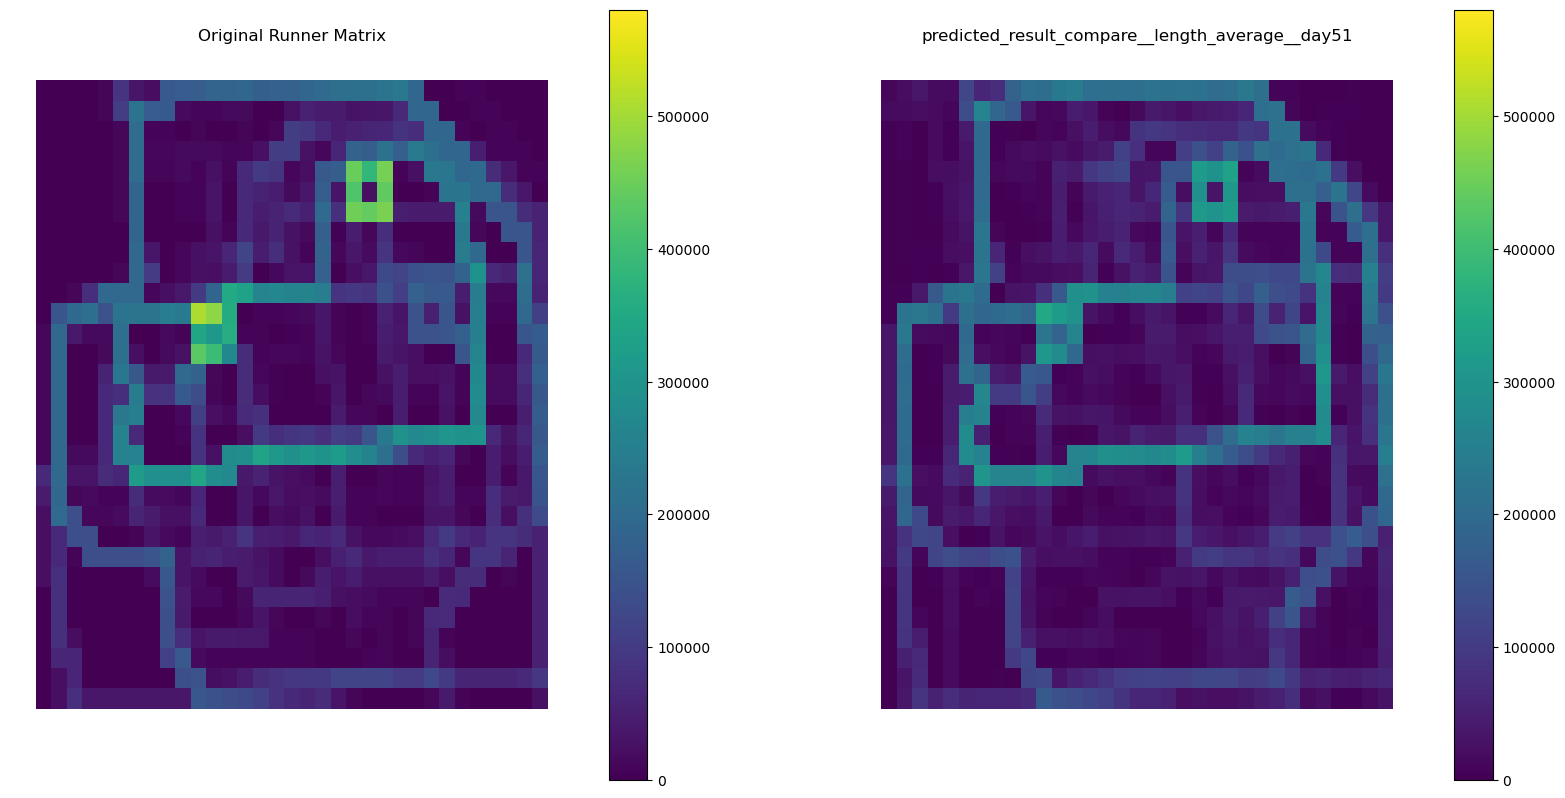

In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt
from tqdm import tqdm

output_array = npy_output
y = npy_y

grid = gpd.read_file('../03_input/grid.geojson')    


max_value = max(np.max(output_array), np.max(y))

for i in tqdm(range(52)):
    # match the output array with the grid
    grid['original_runner_matrix'] = y[i].flatten()
    grid['predicted_runner_matrix'] = output_array[i].flatten()

    # subplot, left is the original runner matrix(keep_num), right is the predicted runner matrix(predicted_runner_matrix)
    # use the same color scale
    # max_value = max(grid['original_runner_matrix'].max(), grid['predicted_runner_matrix'].max())
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    grid.plot(column='original_runner_matrix', ax=ax1, legend=True,  vmin=0, vmax=max_value)
    ax1.set_title('Original Runner Matrix')
    ax1.axis('off')
    grid.plot(column='predicted_runner_matrix', ax=ax2, legend=True,  vmin=0, vmax=max_value)
    ax2.set_title('Predicted Runner Matrix')
    ax2.axis('off')
    # plt.show()
    plt.title(f'predicted_result_compare__length_average__day{i}')
    plt.savefig(f'../04_output/gif_png/runner_matrix__{i}.png')
    # break

In [47]:
# make GIF from png
import os
import imageio
png_dir = '../04_output/gif_png/'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave('../04_output/runner_matrix__test.gif', images, duration=1)


/var/folders/4_/6v8kr_vd5fq5m6wfd4sgqwmw0000gn/T/ipykernel_54719/1188659261.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
